In [1]:
import numpy as np
import pandas as pd
import pegasus as pg

In [2]:
sample_dict = {'Sample': ['02-P166169-S109-R01', '02-P248880-S041-R01', '02-P005175-S022-R01', '02-P118946-S070-R01', '02-P166169-S022-R01', '02-P240970-S016-R01', '02-P334354-S041-R01', '02-P348762-S041-R01', '04-P054921-S080-R01', '04-P079042-S079-R01', '04-P103142-S069-R01', '12-P485759-S020-R01', '12-P230638-S003-R01', '12-P617758-S003-R01', '12-P852049-S003-R01', '12-P890292-S003-R01'], 
               'Location': ['covid_liver/02-P166169-S109-R01_out_FPR_0.01_filtered.h5', 'covid_liver/02-P248880-S041-R01_out_FPR_0.01_filtered.h5', 'covid_liver/02-P005175-S022-R01_out_FPR_0.01_filtered.h5', 'covid_liver/02-P118946-S070-R01_out_FPR_0.01_filtered.h5', 'covid_liver/02-P166169-S022-R01_out_FPR_0.01_filtered.h5', 'covid_liver/02-P240970-S016-R01_out_FPR_0.01_filtered.h5', 'covid_liver/02-P334354-S041-R01_out_FPR_0.01_filtered.h5', 'covid_liver/02-P348762-S041-R01_out_FPR_0.01_filtered.h5', 'covid_liver/04-P054921-S080-R01_out_FPR_0.01_filtered.h5', 'covid_liver/04-P079042-S079-R01_out_FPR_0.01_filtered.h5', 'covid_liver/04-P103142-S069-R01_out_FPR_0.01_filtered.h5', 'covid_liver/12-P485759-S020-R01_out_FPR_0.01_filtered.h5', 'covid_liver/12-P230638-S003-R01_out_FPR_0.01_filtered.h5', 'covid_liver/12-P617758-S003-R01_out_FPR_0.01_filtered.h5', 'covid_liver/12-P852049-S003-R01_out_FPR_0.01_filtered.h5', 'covid_liver/12-P890292-S003-R01_out_FPR_0.01_filtered.h5'],
               'Method': ['nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei']
              }

In [3]:
data = pg.aggregate_matrices(sample_dict, attributes = ['Method'], default_ref = 'GRCh38:GRCh38premrna')

2021-01-28 15:48:28,225 - pegasusio.readwrite - INFO - 10x file 'covid_liver/02-P005175-S022-R01_out_FPR_0.01_filtered.h5' is loaded.
2021-01-28 15:48:28,226 - pegasusio.readwrite - INFO - Function 'read_input' finished in 0.26s.
2021-01-28 15:48:28,393 - pegasusio.readwrite - INFO - 10x file 'covid_liver/02-P118946-S070-R01_out_FPR_0.01_filtered.h5' is loaded.
2021-01-28 15:48:28,394 - pegasusio.readwrite - INFO - Function 'read_input' finished in 0.17s.
2021-01-28 15:48:28,454 - pegasusio.qc_utils - INFO - After filtration, 2142 out of 2142 cell barcodes are kept in UnimodalData object GRCh38premrna-rna.
2021-01-28 15:48:28,505 - pegasusio.multimodal_data - INFO - After filtration, 2142 out of 2142 cell barcodes are kept in UnimodalData object SARSCoV2-rna.
2021-01-28 15:48:28,675 - pegasusio.readwrite - INFO - 10x file 'covid_liver/02-P166169-S022-R01_out_FPR_0.01_filtered.h5' is loaded.
2021-01-28 15:48:28,676 - pegasusio.readwrite - INFO - Function 'read_input' finished in 0.17s.


2021-01-28 15:48:34,005 - pegasusio.qc_utils - INFO - After filtration, 9286 out of 9286 cell barcodes are kept in UnimodalData object GRCh38premrna-rna.
2021-01-28 15:48:34,058 - pegasusio.multimodal_data - INFO - After filtration, 9286 out of 9286 cell barcodes are kept in UnimodalData object SARSCoV2-rna.
2021-01-28 15:48:35,187 - pegasusio.aggr_data - INFO - Function 'aggregate' finished in 1.11s.
2021-01-28 15:48:35,457 - pegasusio.data_aggregation - INFO - Aggregated 16 files.
2021-01-28 15:48:35,459 - pegasusio.data_aggregation - INFO - Function 'aggregate_matrices' finished in 7.50s.


In [4]:
pg.qc_metrics(data, min_genes = 200, max_genes = 6000, min_umis = 400, max_umis = 600000, mito_prefix = 'MT-', percent_mito = 20)
pg.filter_data(data)
pg.identify_robust_genes(data)
pg.log_norm(data)
pg.highly_variable_features(data, consider_batch=True)
pg.pca(data, robust=True)
pca_key = pg.run_harmony(data)
pg.neighbors(data, rep=pca_key)
pg.louvain(data, rep=pca_key)
pg.umap(data, rep=pca_key)

2021-01-28 15:48:43,833 - pegasusio.qc_utils - INFO - After filtration, 47001 out of 85262 cell barcodes are kept in UnimodalData object GRCh38premrna-rna.
2021-01-28 15:48:43,906 - pegasusio.multimodal_data - INFO - After filtration, 47001 out of 85262 cell barcodes are kept in UnimodalData object SARSCoV2-rna.
2021-01-28 15:48:43,907 - pegasus.tools.preprocessing - INFO - Function 'filter_data' finished in 0.45s.
2021-01-28 15:48:45,109 - pegasus.tools.preprocessing - INFO - After filtration, 29972/33538 genes are kept. Among 29972 genes, 23347 genes are robust.
2021-01-28 15:48:45,110 - pegasus.tools.preprocessing - INFO - Function 'identify_robust_genes' finished in 1.20s.
2021-01-28 15:48:46,101 - pegasus.tools.preprocessing - INFO - Function 'log_norm' finished in 0.99s.
2021-01-28 15:48:46,610 - pegasus.tools.hvf_selection - INFO - Function 'estimate_feature_statistics' finished in 0.51s.
2021-01-28 15:48:46,656 - pegasus.tools.hvf_selection - INFO - 2000 highly variable feature

/Users/bl621/Documents/software/miniconda3/envs/pegasus/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
Reach convergence after 3 iteration(s).
2021-01-28 15:49:15,567 - pegasus.tools.batch_correction - INFO - Function 'run_harmony' finished in 22.57s.
2021-01-28 15:49:23,556 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 7.99s.
2021-01-28 15:49:25,052 - pegasus.tools.nearest_neighbors - INFO - Function 'calculate_affinity_matrix' finished in 1.50s.
2021-01-28 15:49:26,830 - pegasus.tools.graph_operations - INFO - Function 'construct_graph' finished in 1.77s.
2021-01-28 15:50:02,105 - pegasus.tools.clustering - INFO - Louvain clustering is done. Get 19 clusters.
2021-01-28 15:50:02,271 - pegasus.tools.clustering - INFO - Function 'louvain' finished in 37.22s.
2021-01-28 15:50:02,272 - pegasus.tools.nearest_neighbors - INFO - Found cached kNN results, no calculation is required.
2021-01-28 15:50:02,273 - pegasus.tools.nearest_neighb

2021-01-28 15:50:31,945 - pegasus.tools.preprocessing - INFO - After filtration, 20024/29972 genes are kept. Among 20024 genes, 20024 genes are robust.
2021-01-28 15:50:31,945 - pegasus.tools.preprocessing - INFO - Function 'identify_robust_genes' finished in 0.09s.
2021-01-28 15:50:31,954 - pegasus.tools.preprocessing - INFO - Function 'log_norm' finished in 0.01s.
2021-01-28 15:50:31,958 - pegasus.tools.hvf_selection - INFO - Function 'estimate_feature_statistics' finished in 0.00s.
2021-01-28 15:50:31,996 - pegasus.tools.hvf_selection - INFO - 2000 highly variable features have been selected.
2021-01-28 15:50:31,997 - pegasus.tools.hvf_selection - INFO - Function 'highly_variable_features' finished in 0.04s.
2021-01-28 15:50:32,191 - pegasus.tools.doublet_detection - INFO - Sample 02-P005175-S022-R01: doublet threshold = 0.0377; total cells = 482; neotypic doublet rate = 0.21%
2021-01-28 15:50:32,618 - pegasus.tools.doublet_detection - INFO - Function '_run_scrublet' finished in 0.6

2021-01-28 15:50:46,898 - pegasus.tools.doublet_detection - INFO - Function '_run_scrublet' finished in 3.02s.
2021-01-28 15:50:47,655 - pegasus.tools.doublet_detection - WARNING - Channel 04-P103142-S069-R01 has 14 < 100 cells and thus doublet score calculation is skipped!
2021-01-28 15:50:48,222 - pegasus.tools.preprocessing - INFO - After filtration, 26134/29972 genes are kept. Among 26134 genes, 22717 genes are robust.
2021-01-28 15:50:48,222 - pegasus.tools.preprocessing - INFO - Function 'identify_robust_genes' finished in 0.50s.
2021-01-28 15:50:48,434 - pegasus.tools.preprocessing - INFO - Function 'log_norm' finished in 0.21s.
2021-01-28 15:50:48,479 - pegasus.tools.hvf_selection - INFO - Function 'estimate_feature_statistics' finished in 0.04s.
2021-01-28 15:50:48,524 - pegasus.tools.hvf_selection - INFO - 2000 highly variable features have been selected.
2021-01-28 15:50:48,525 - pegasus.tools.hvf_selection - INFO - Function 'highly_variable_features' finished in 0.09s.
2021

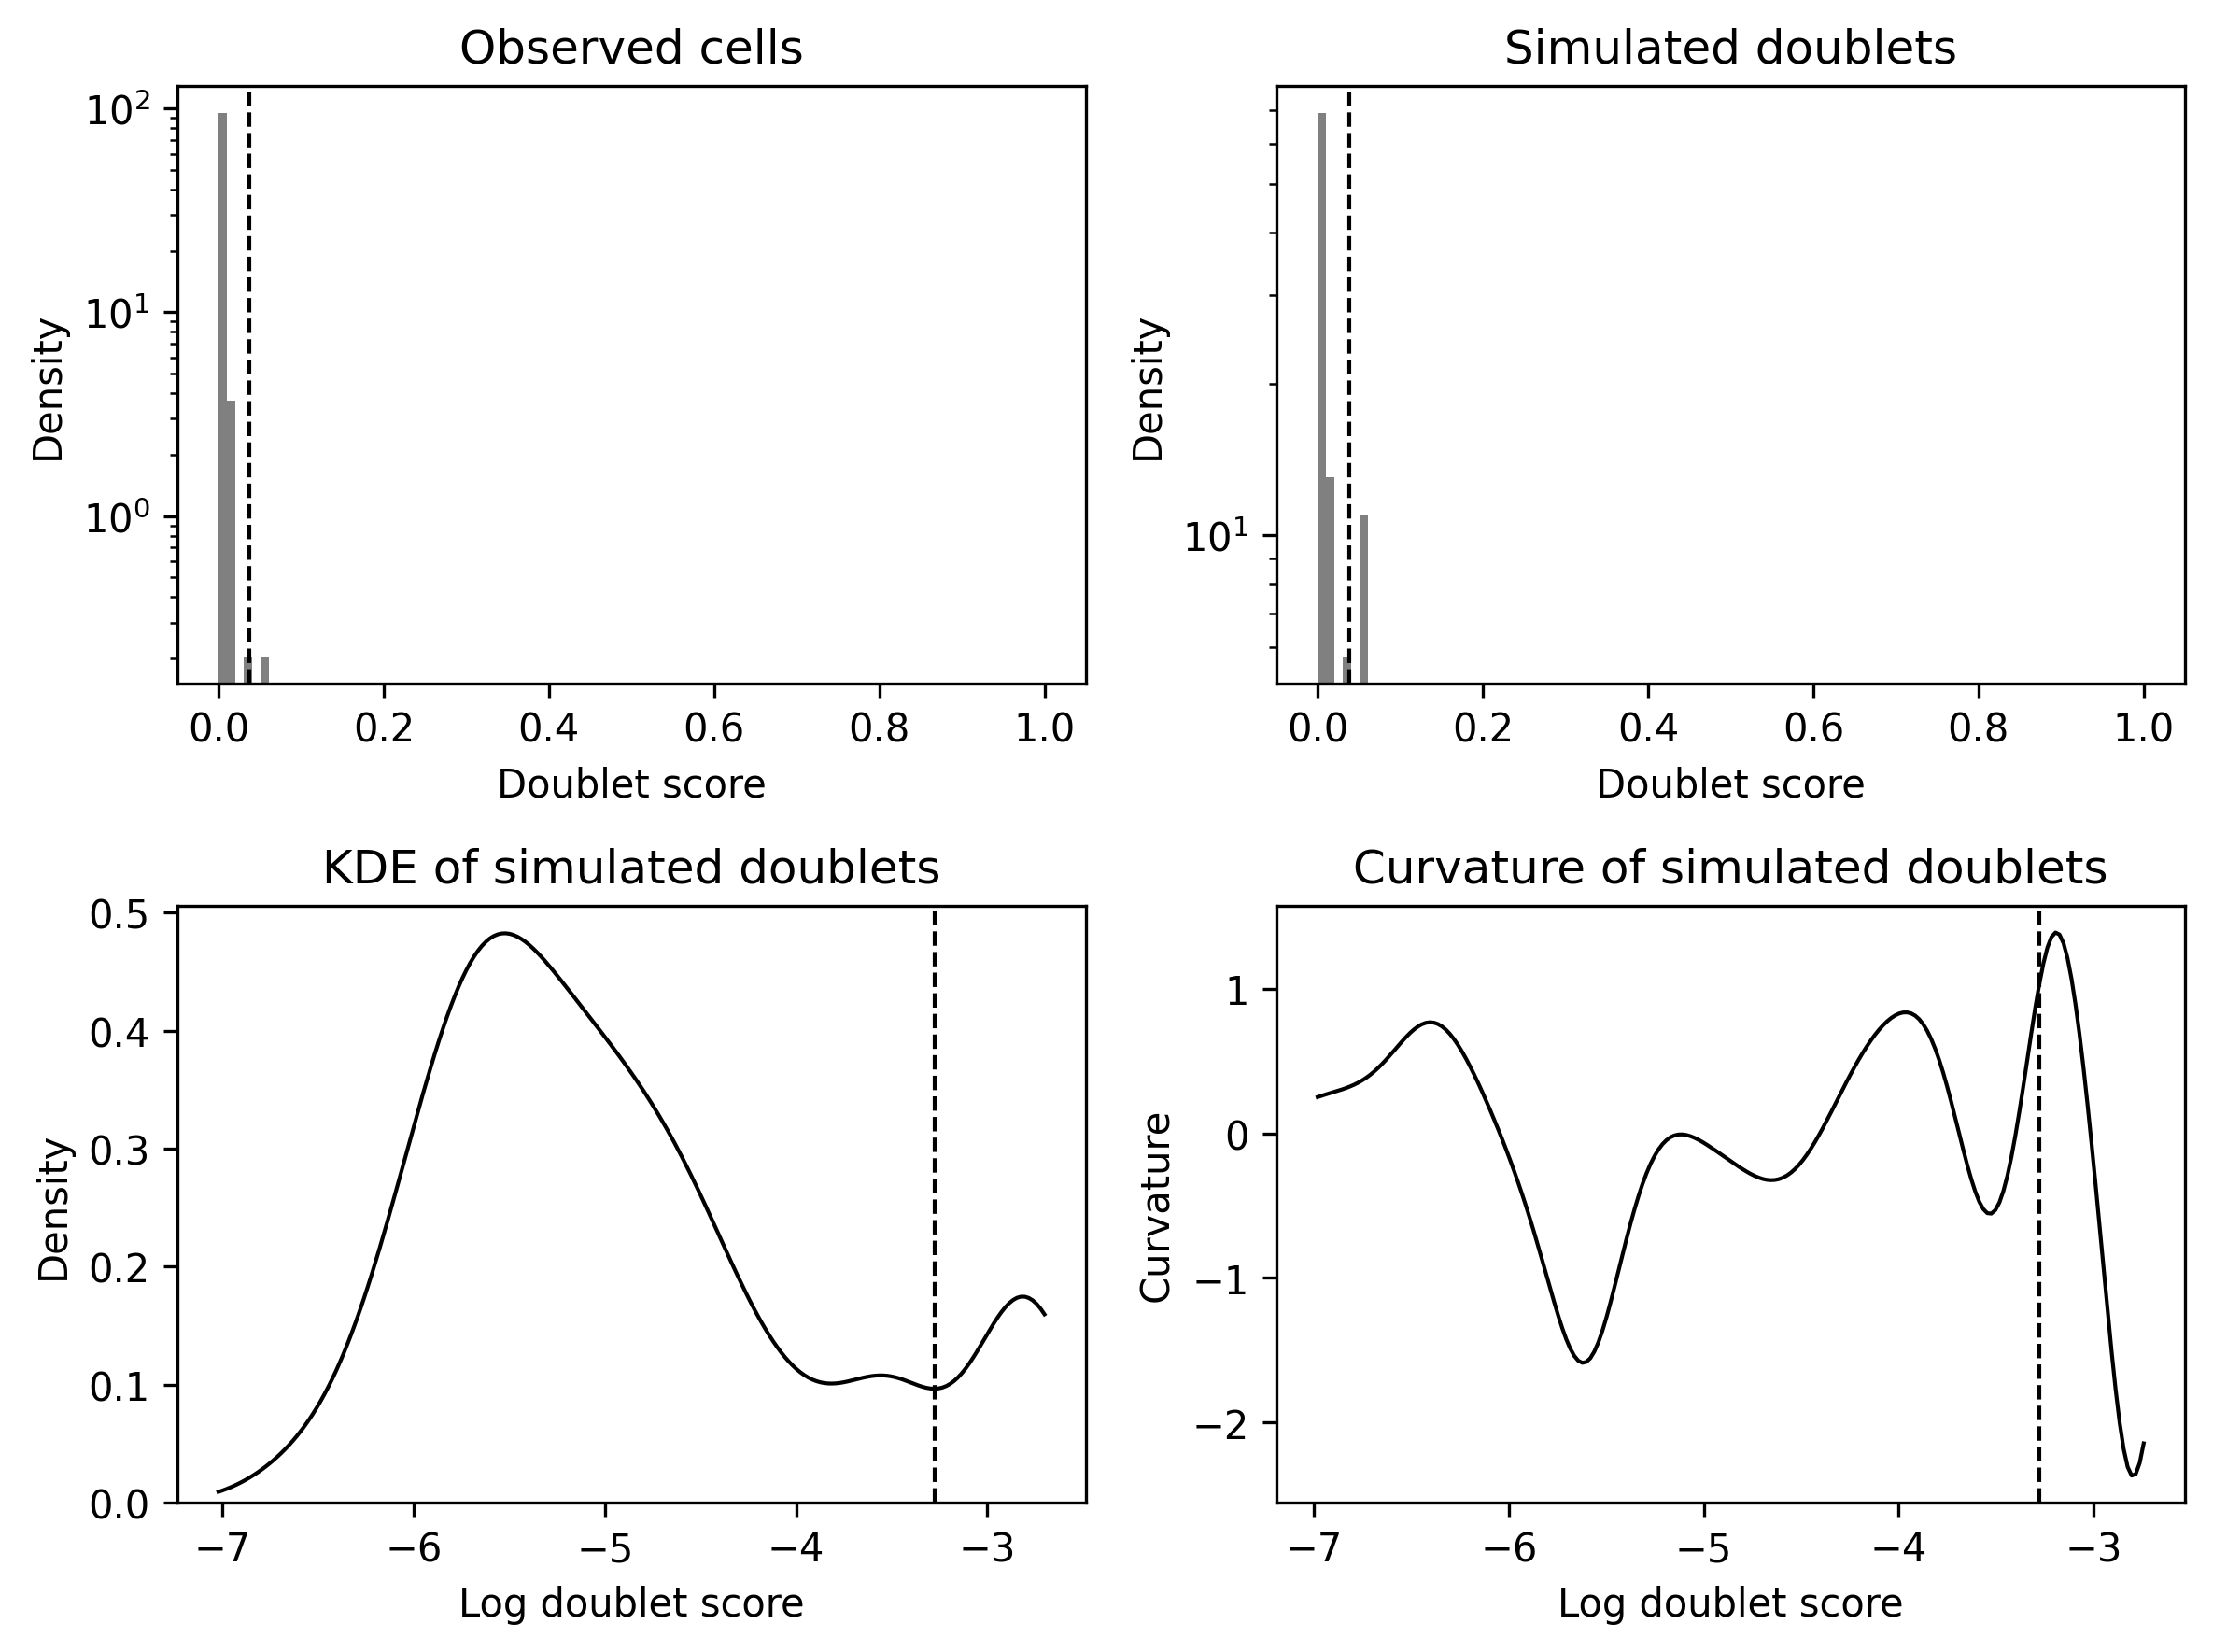

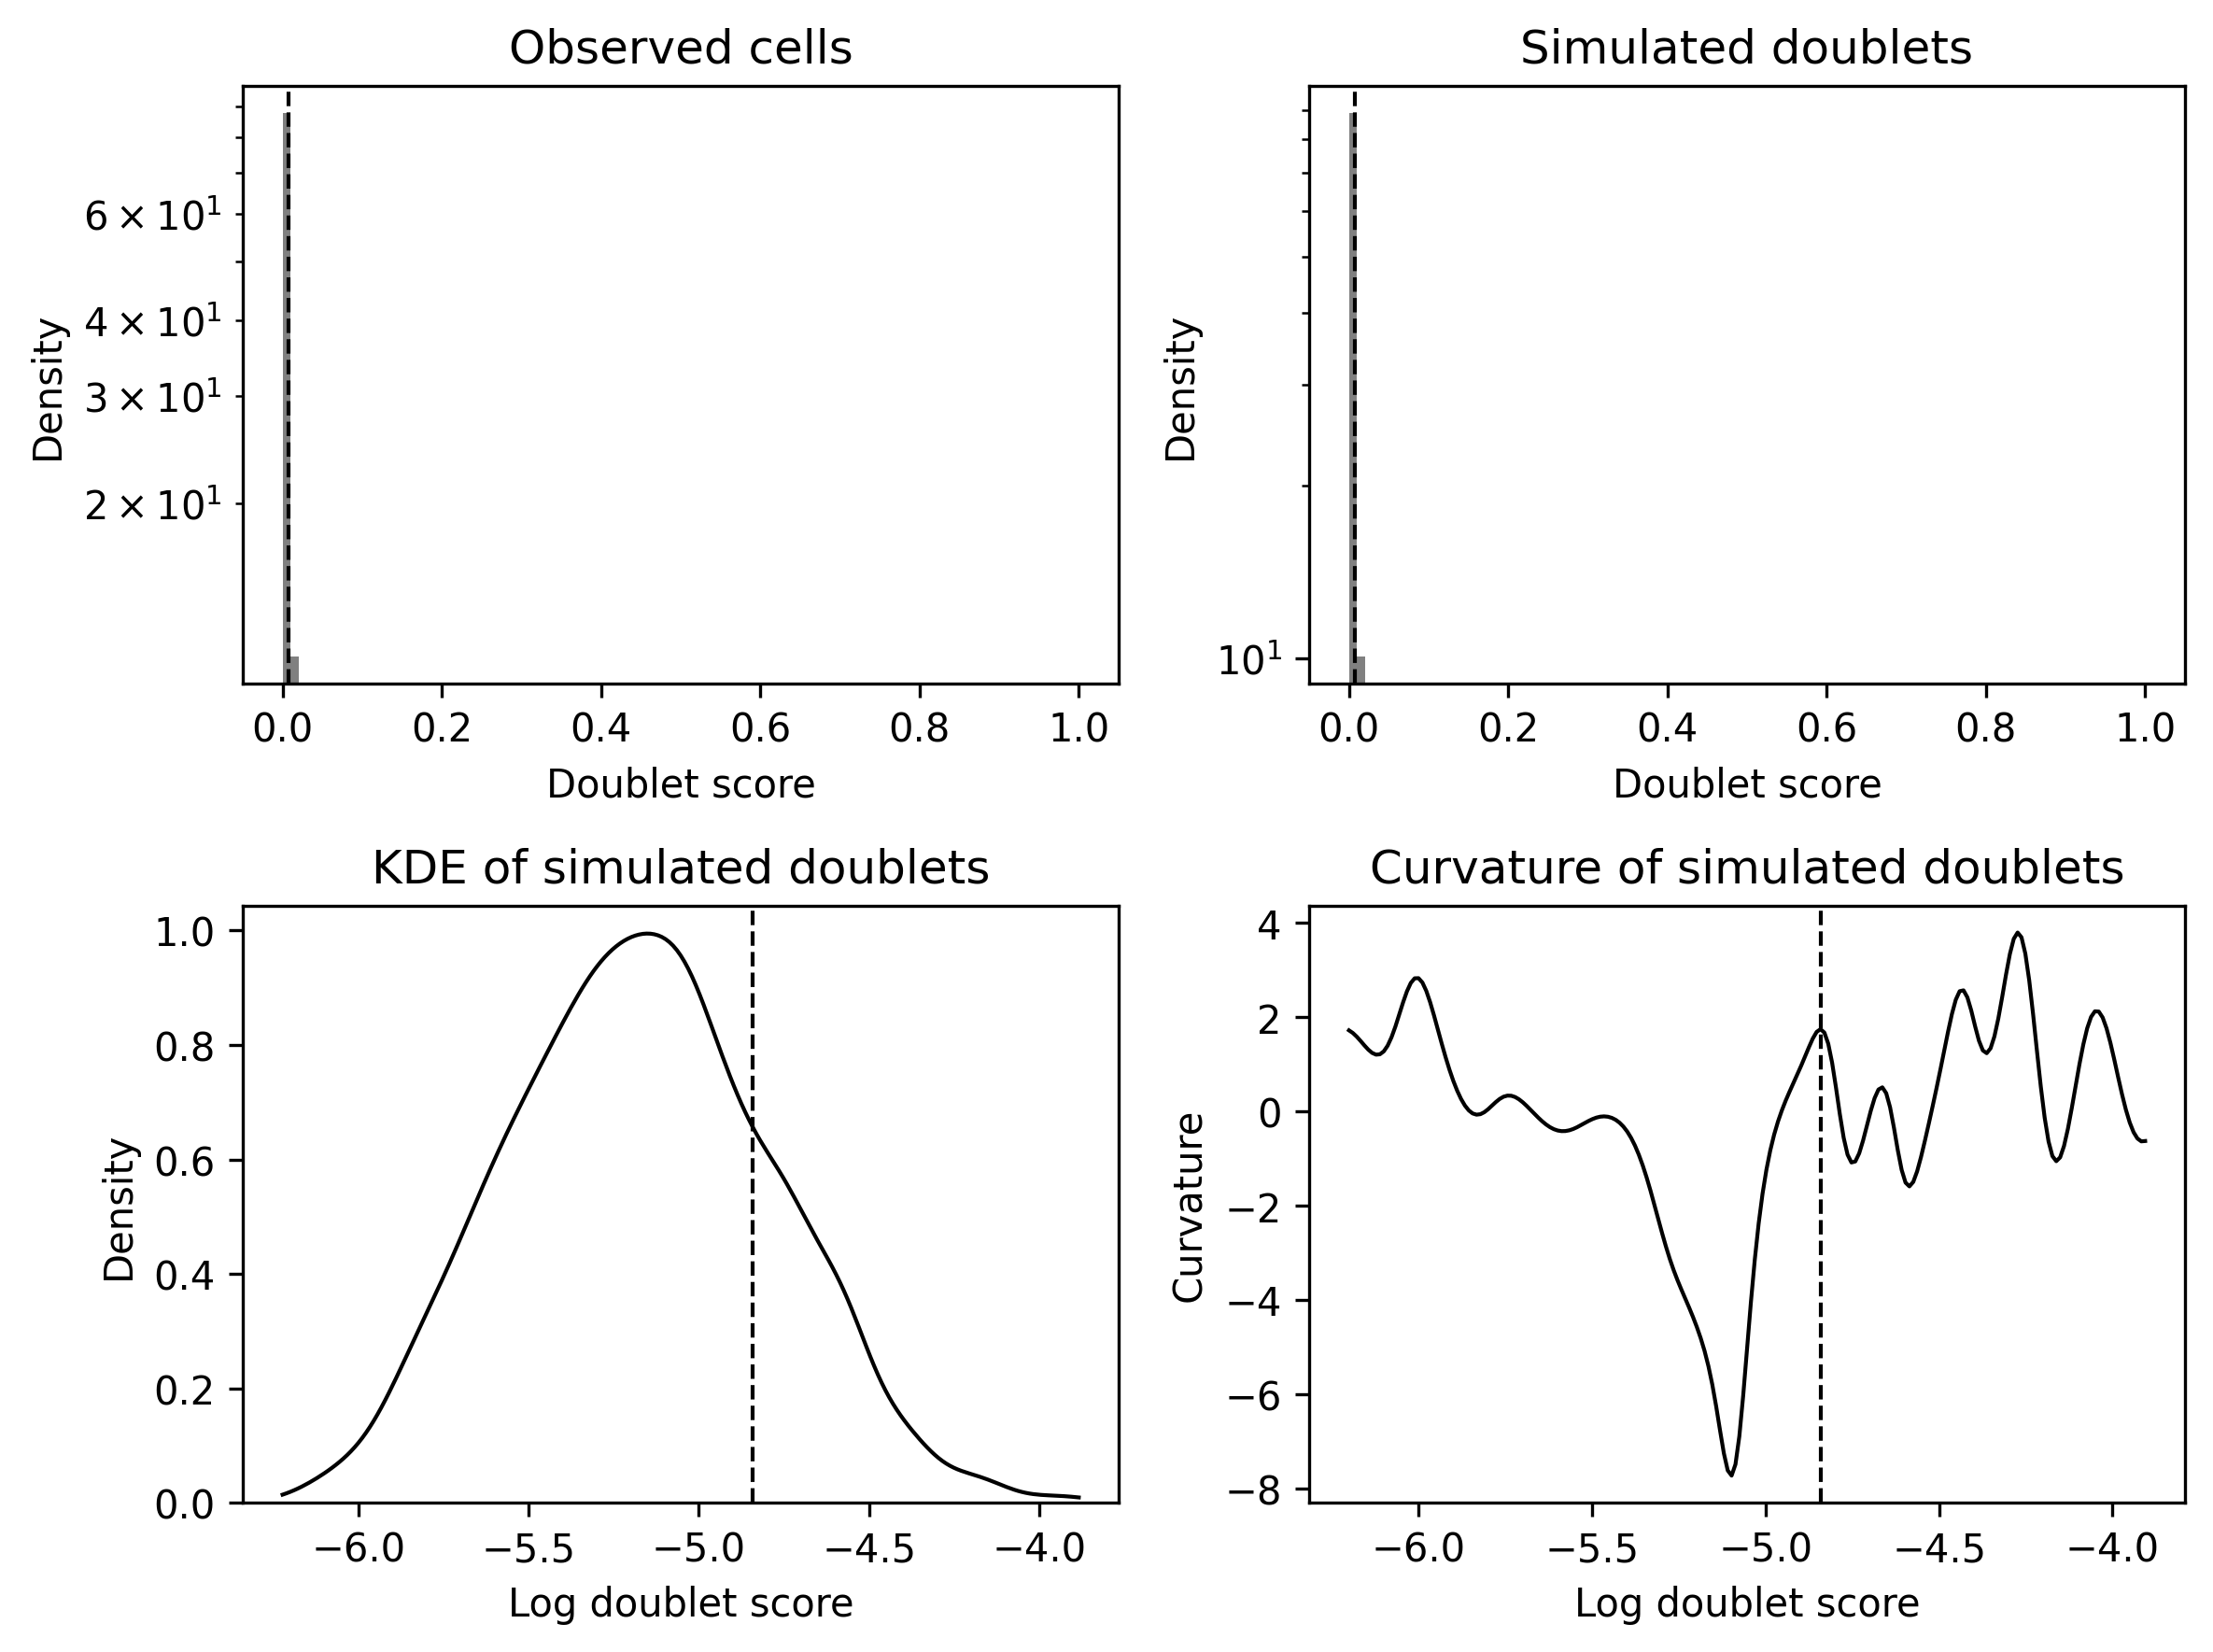

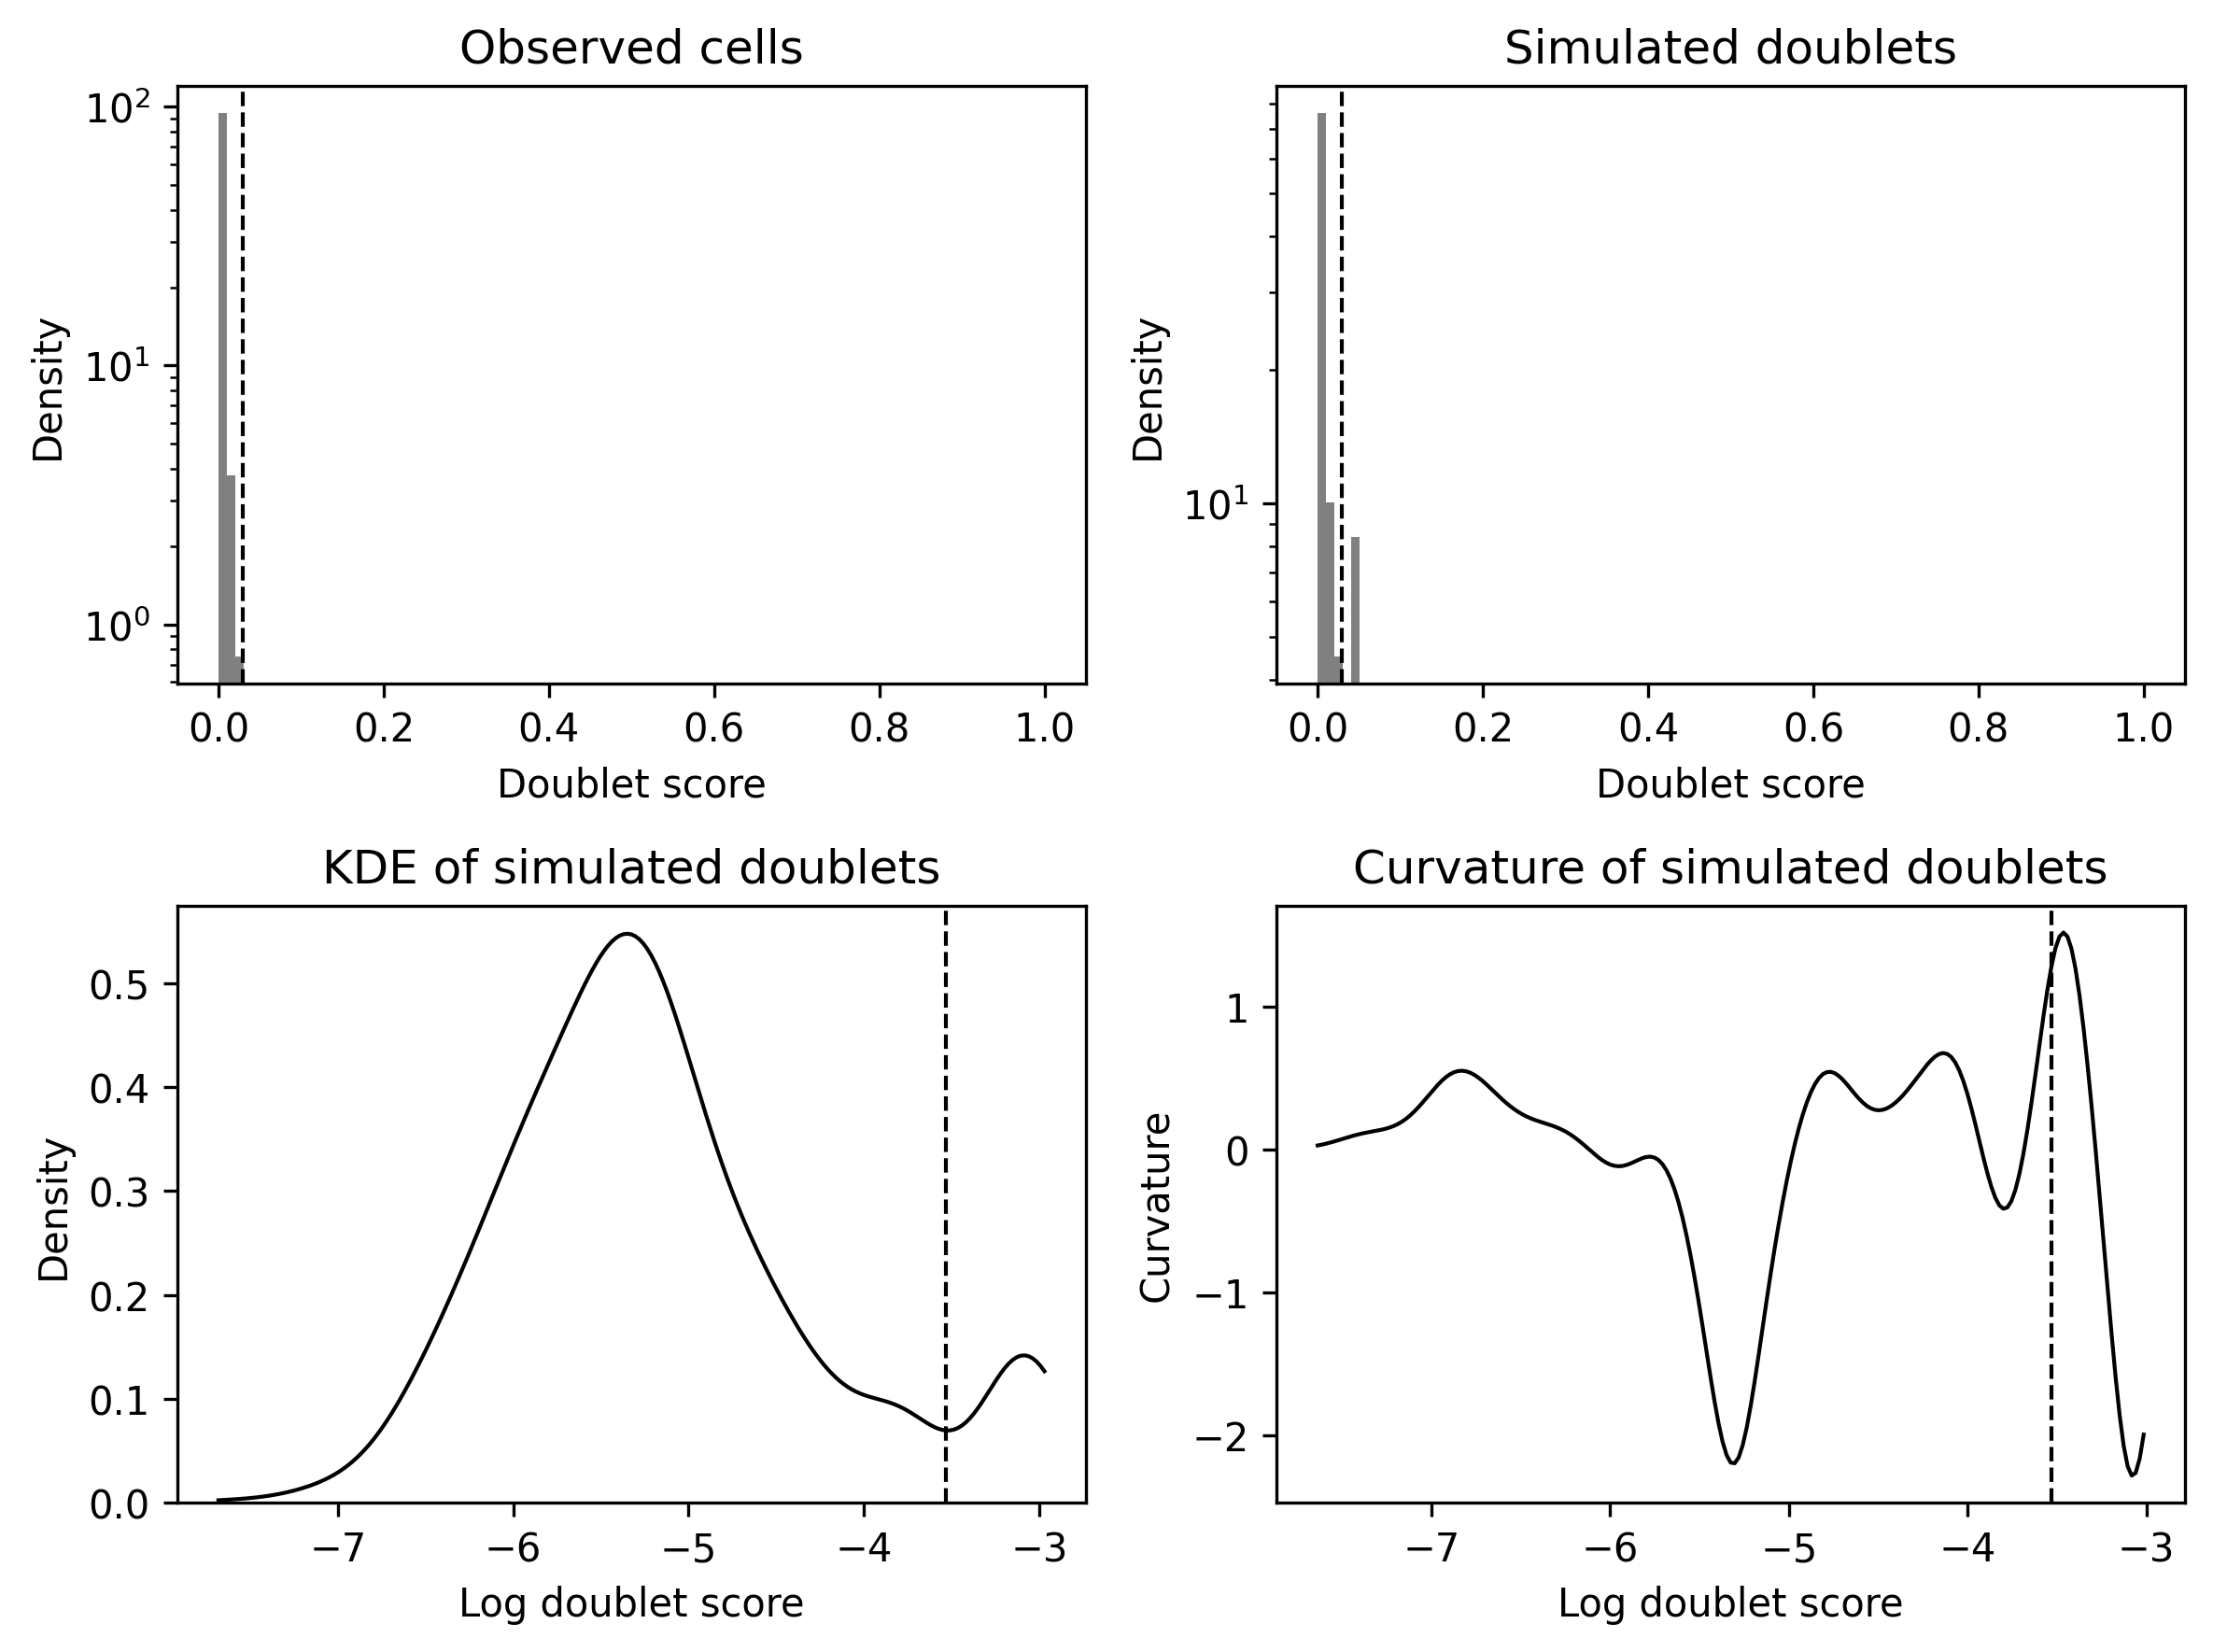

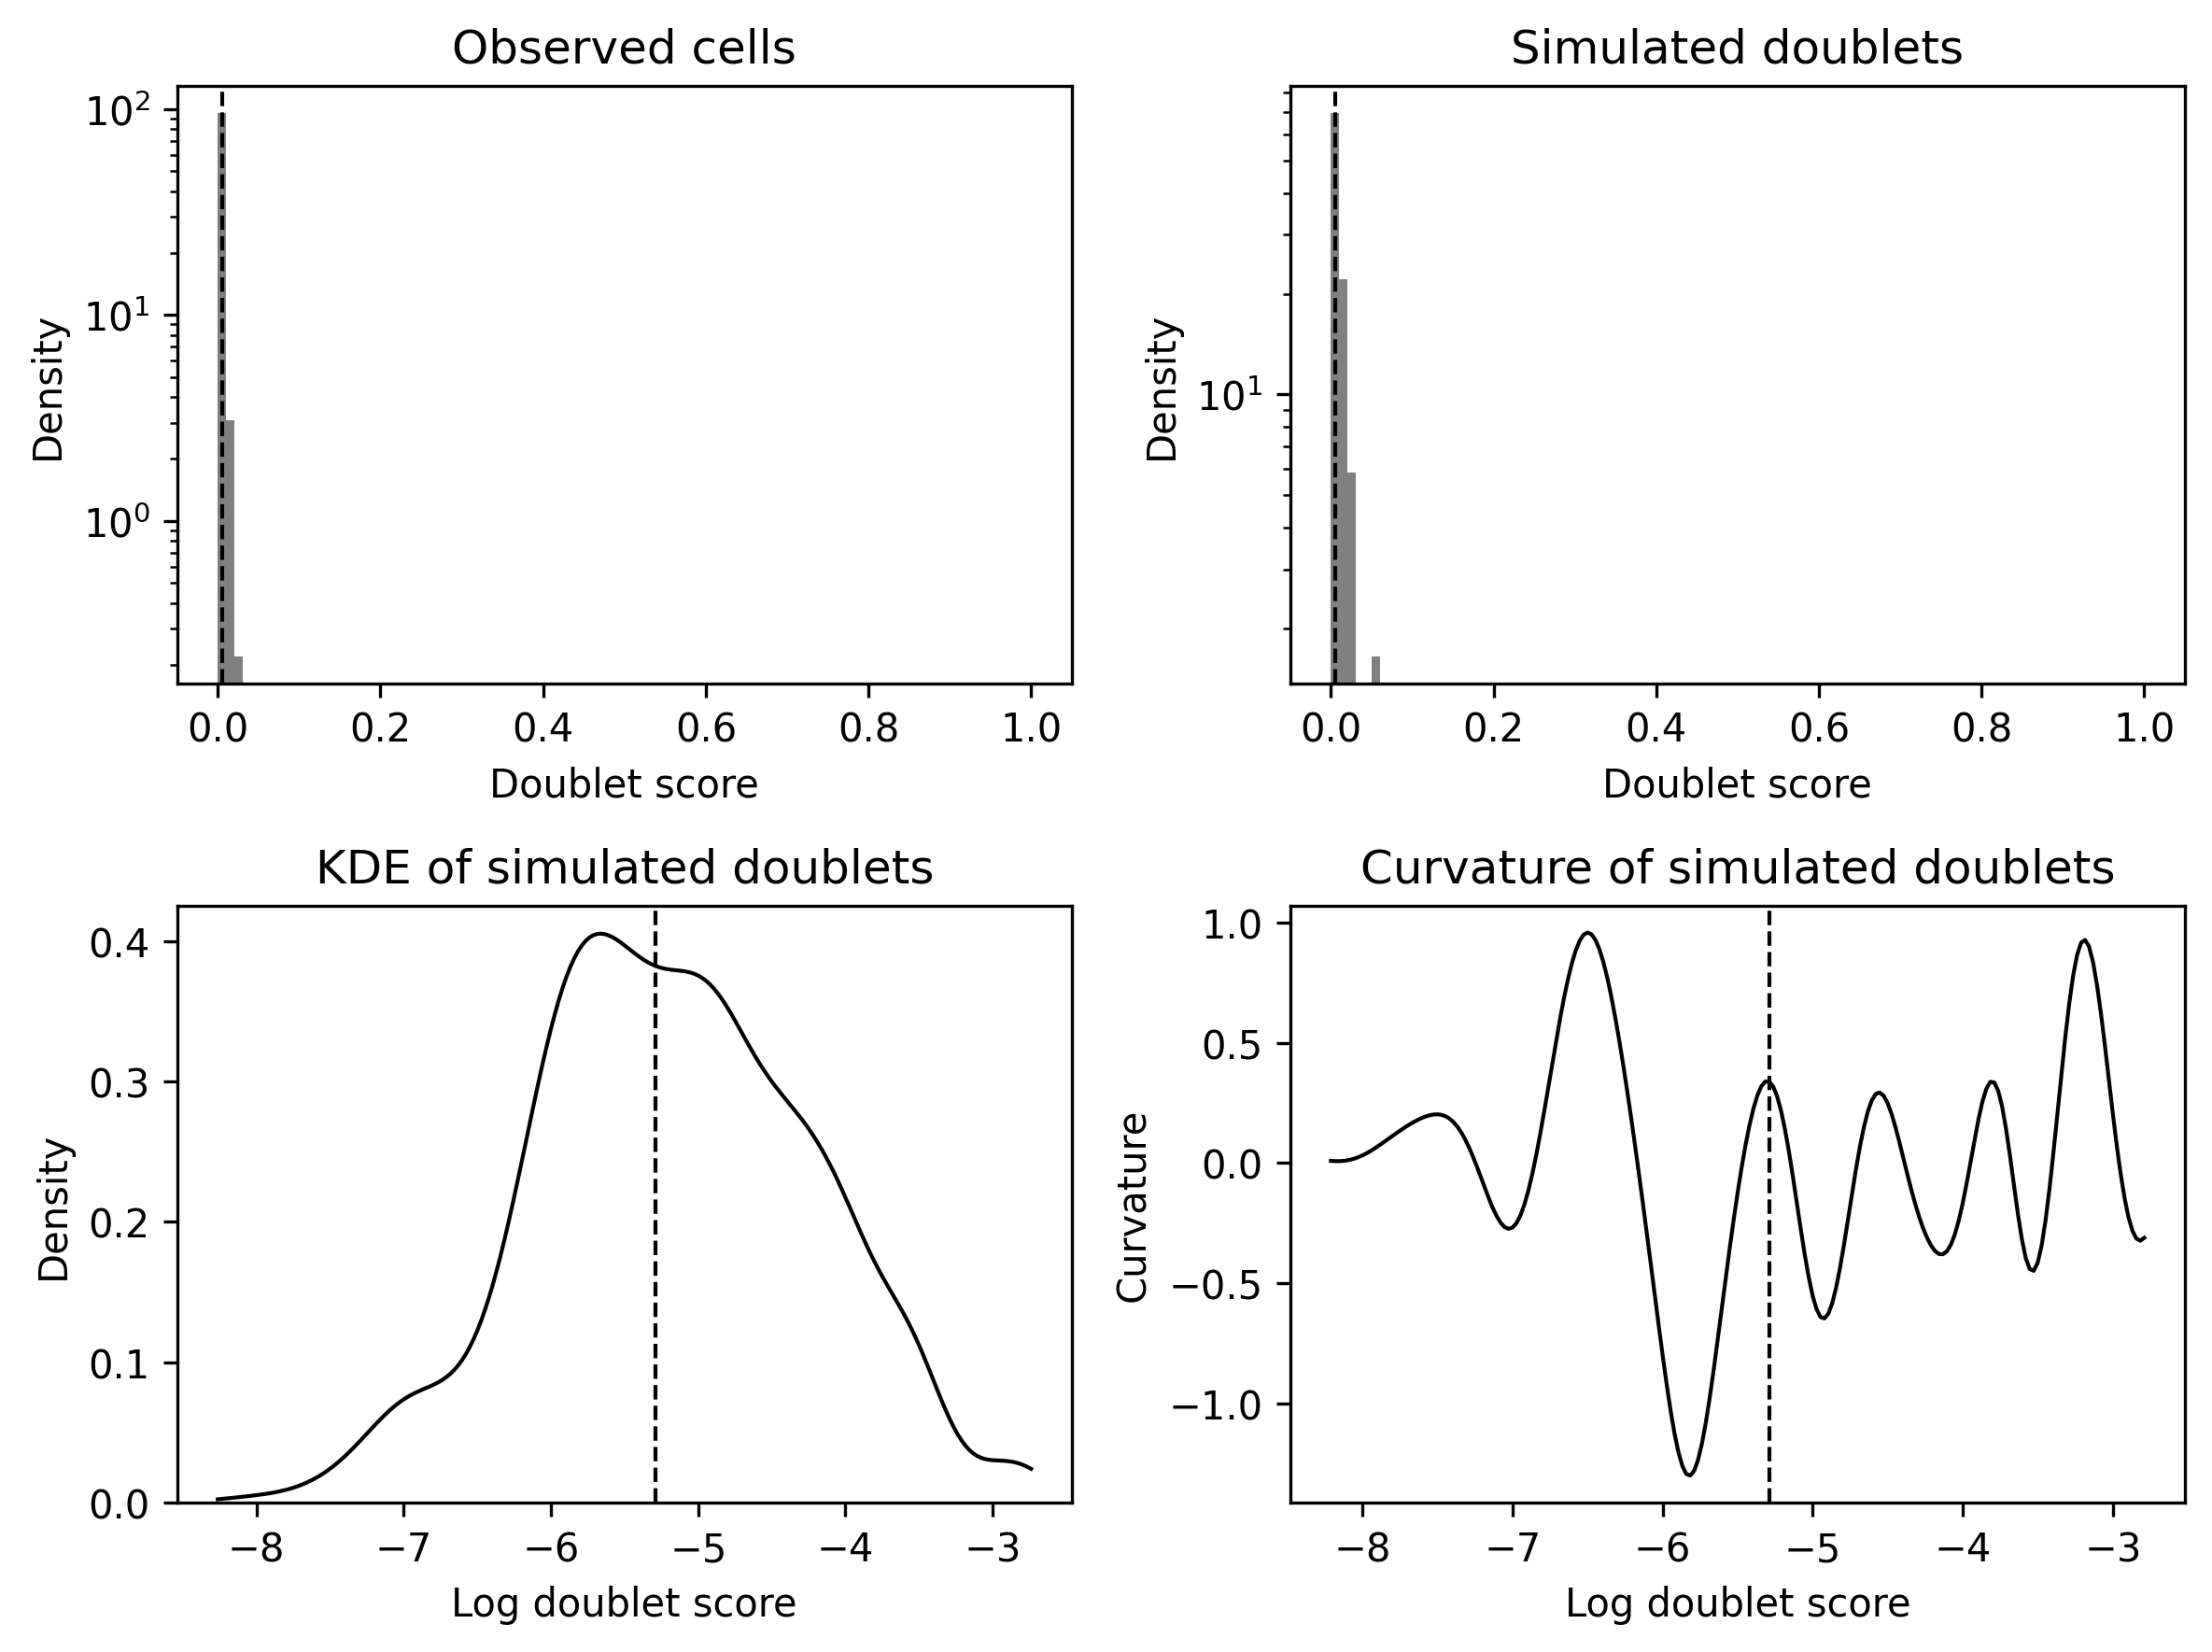

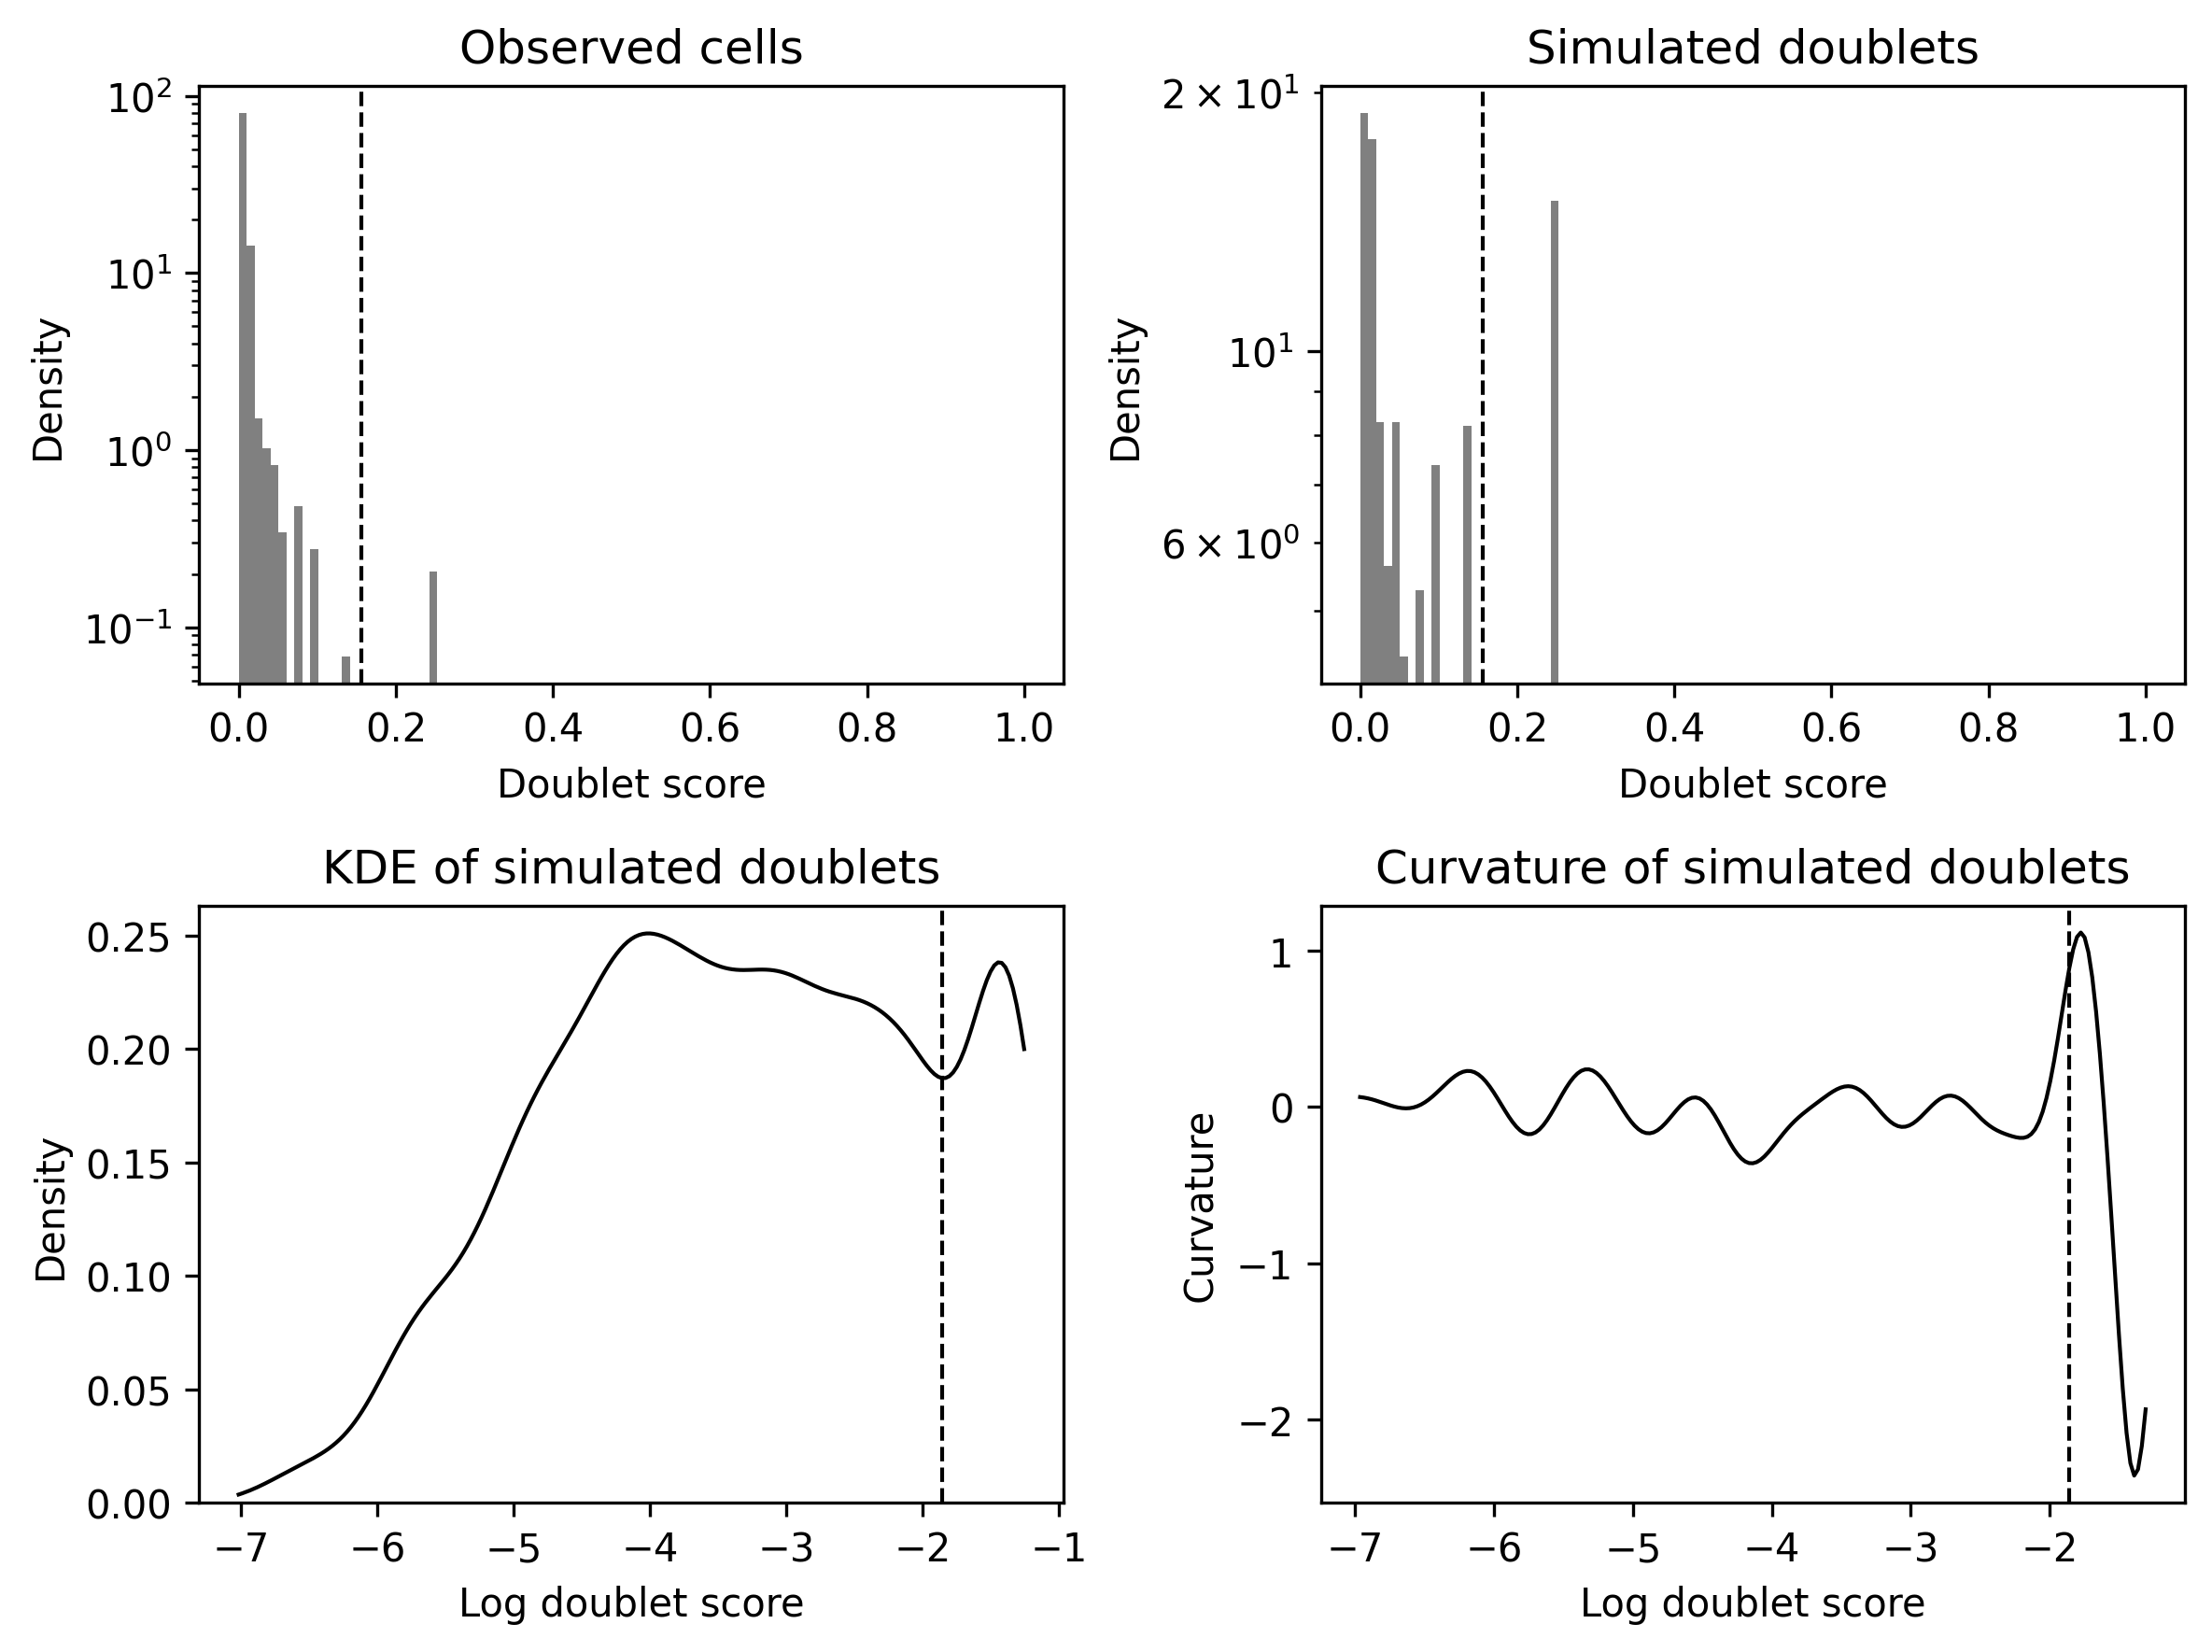

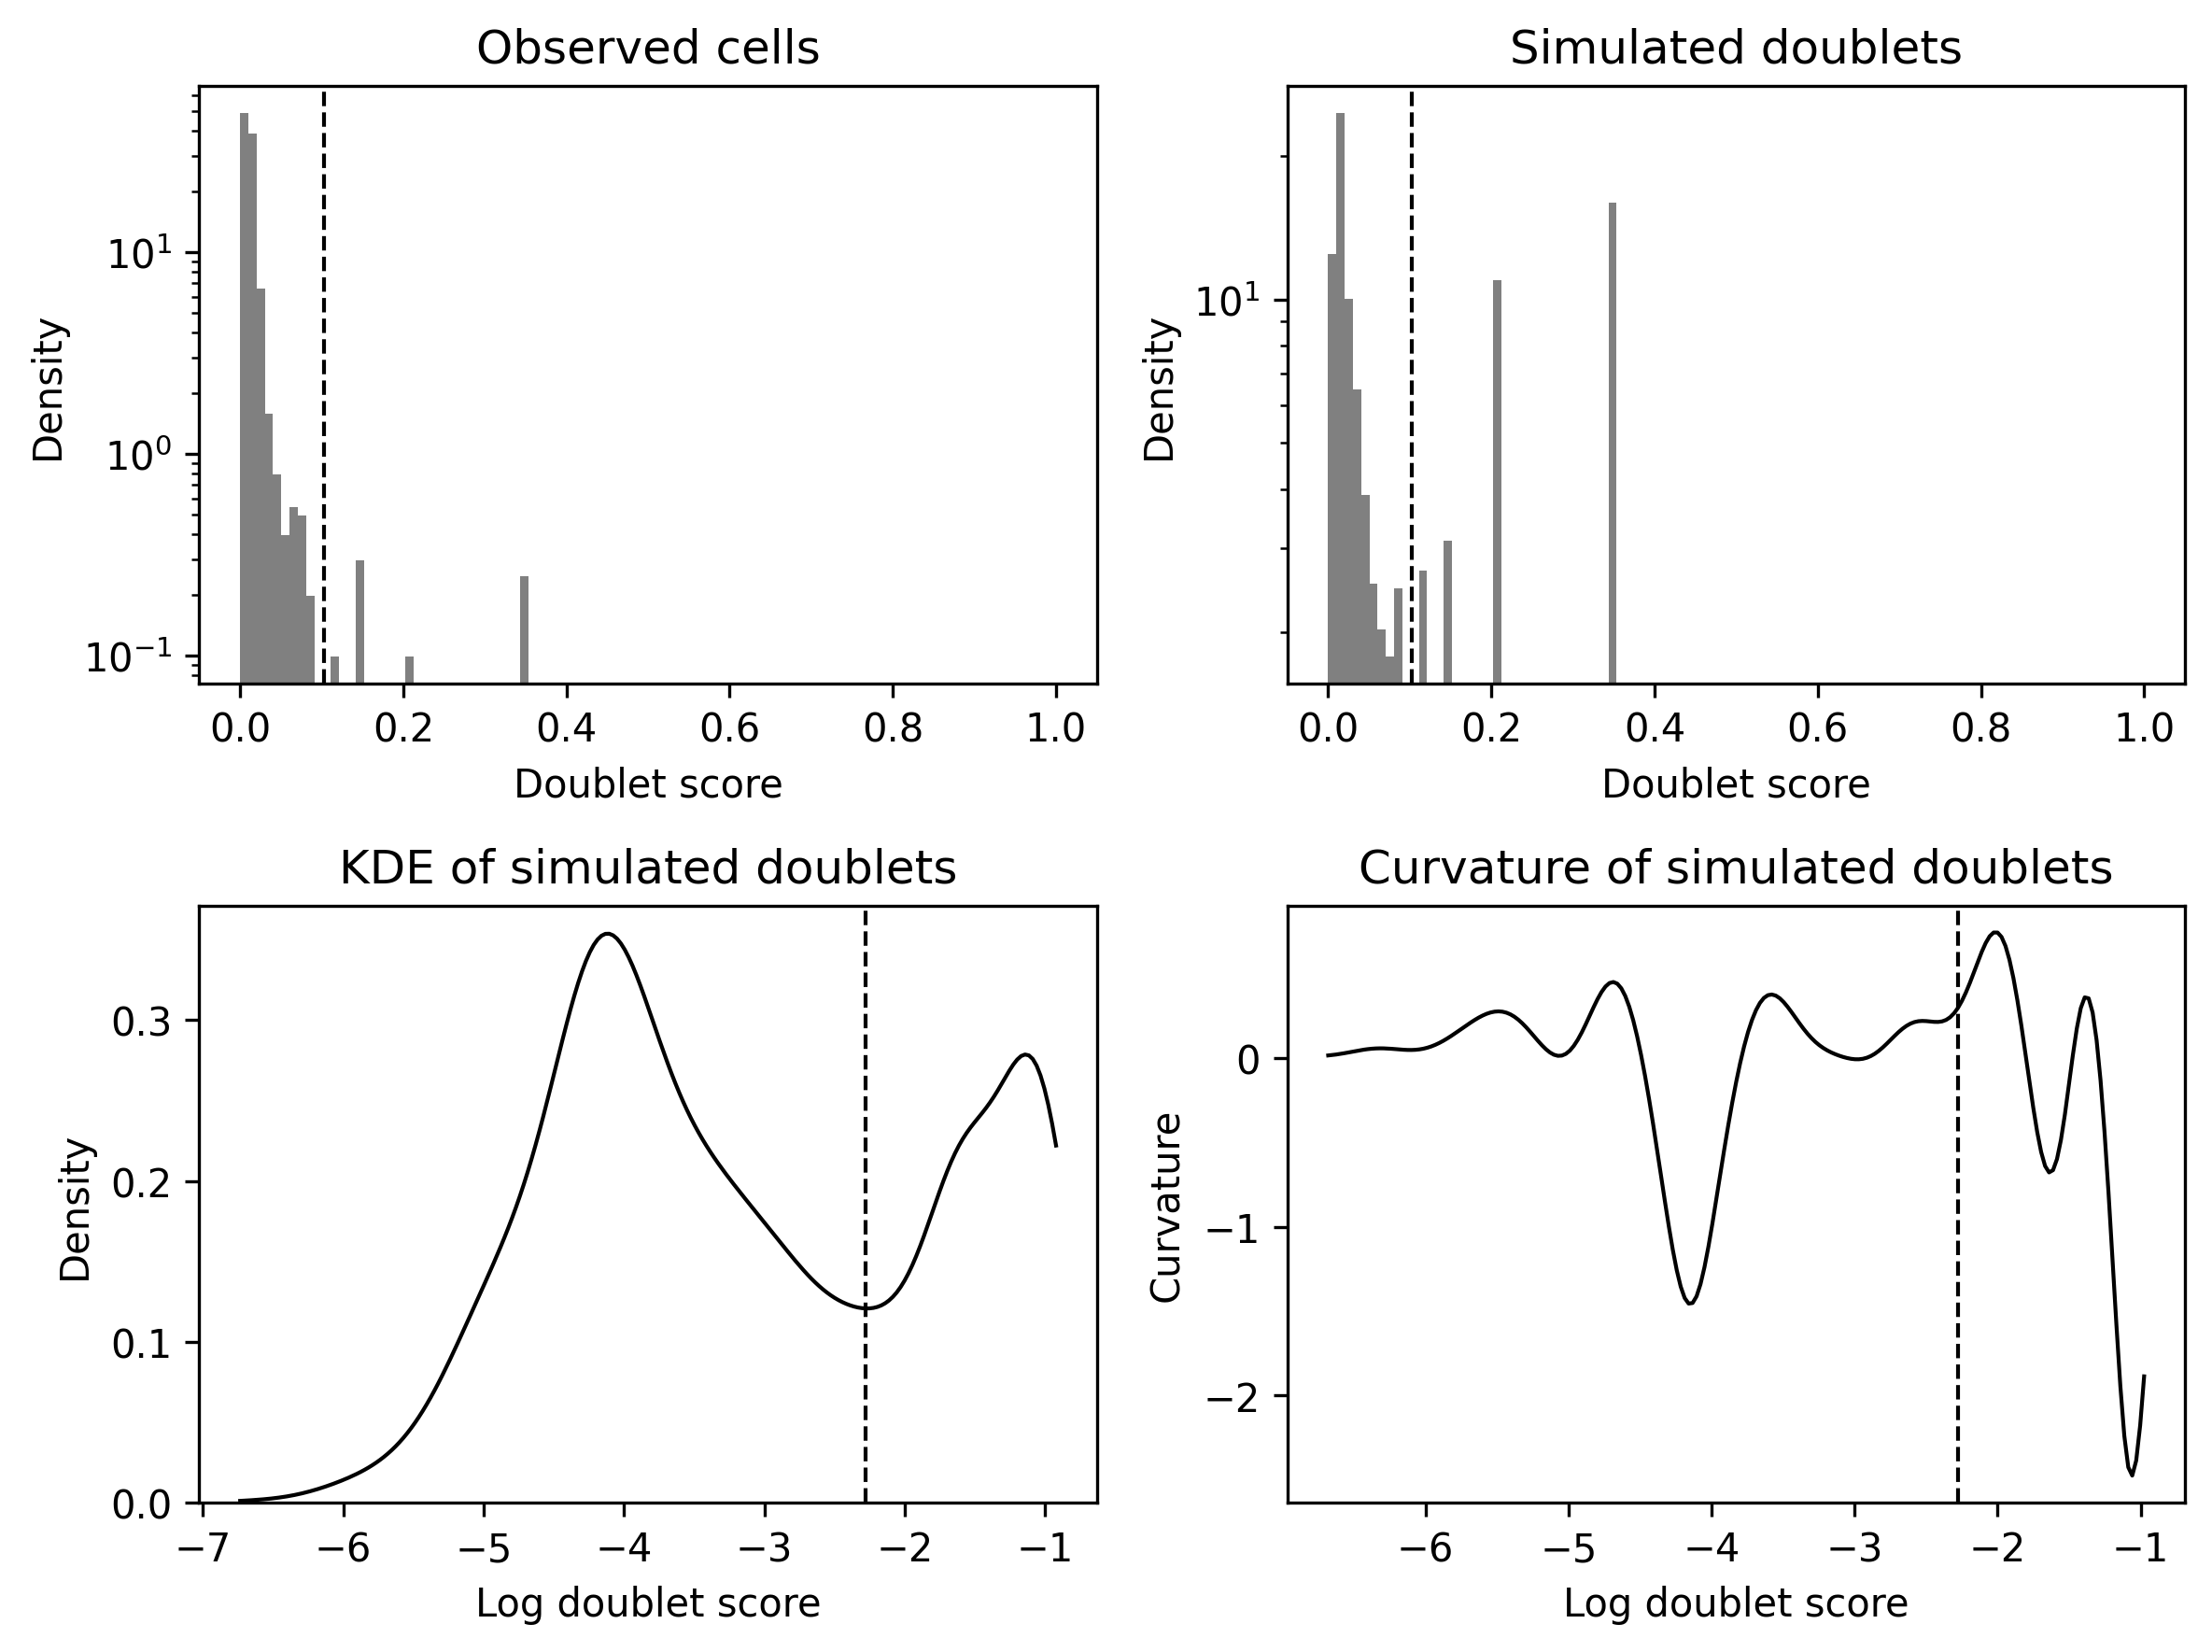

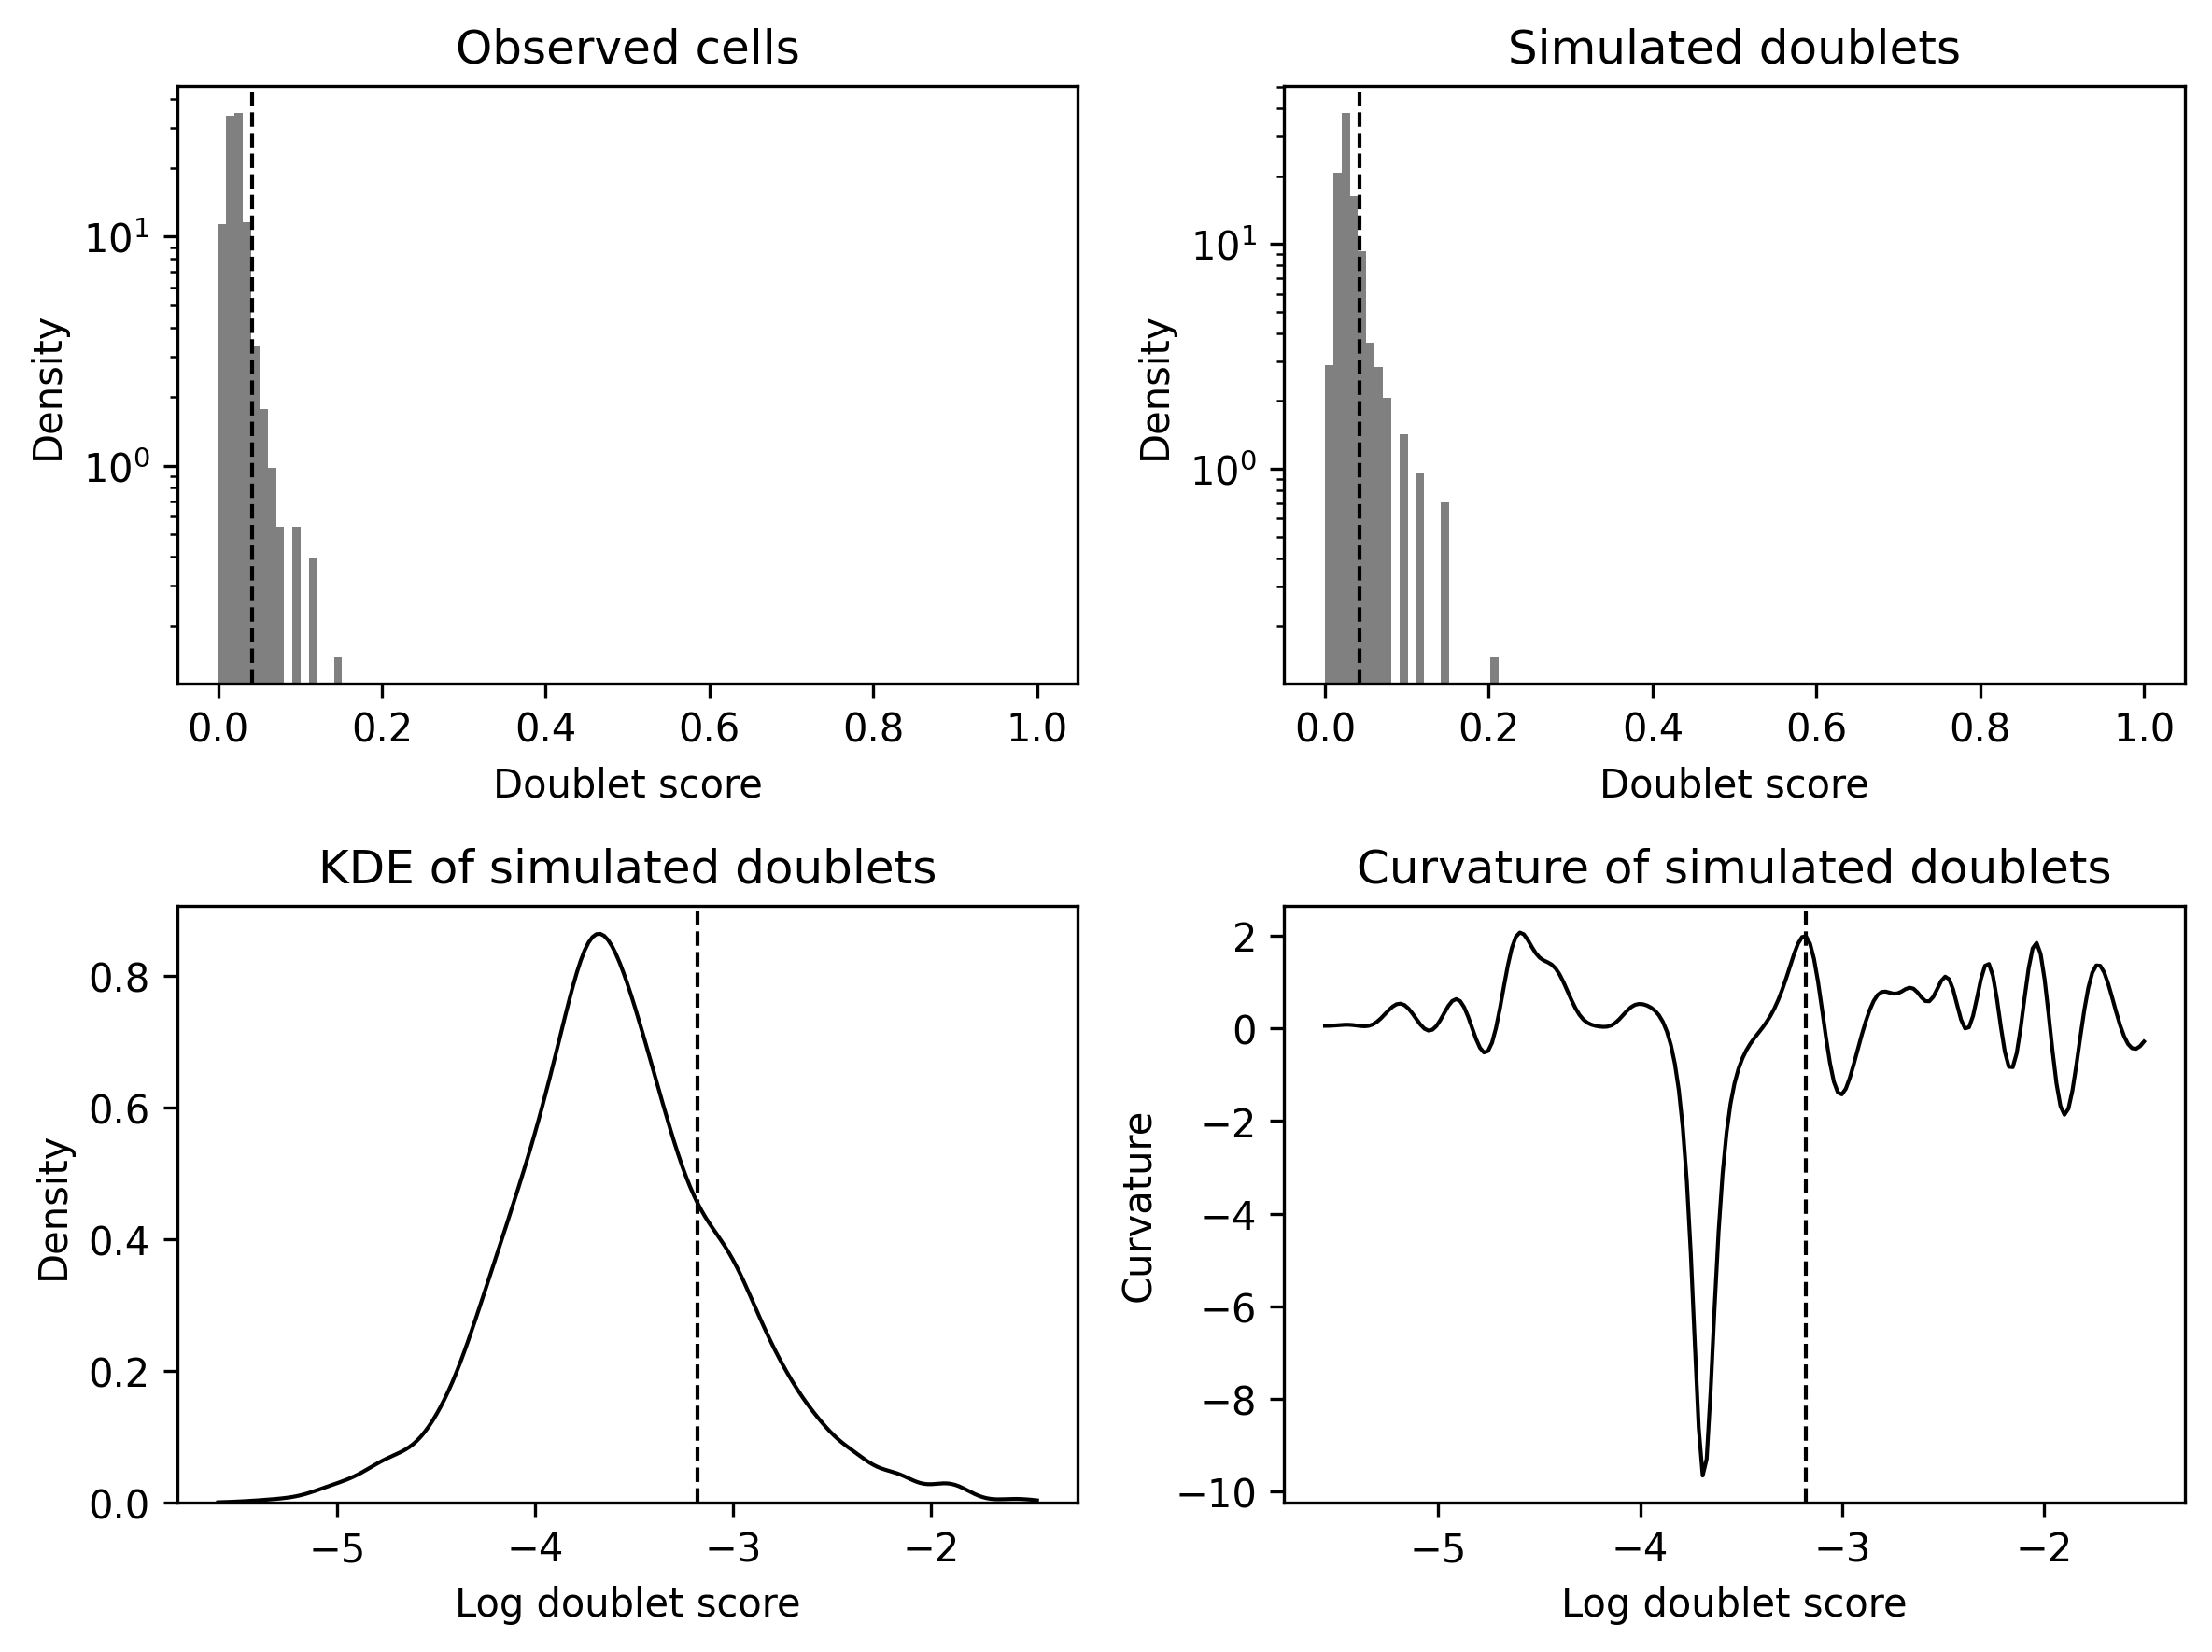

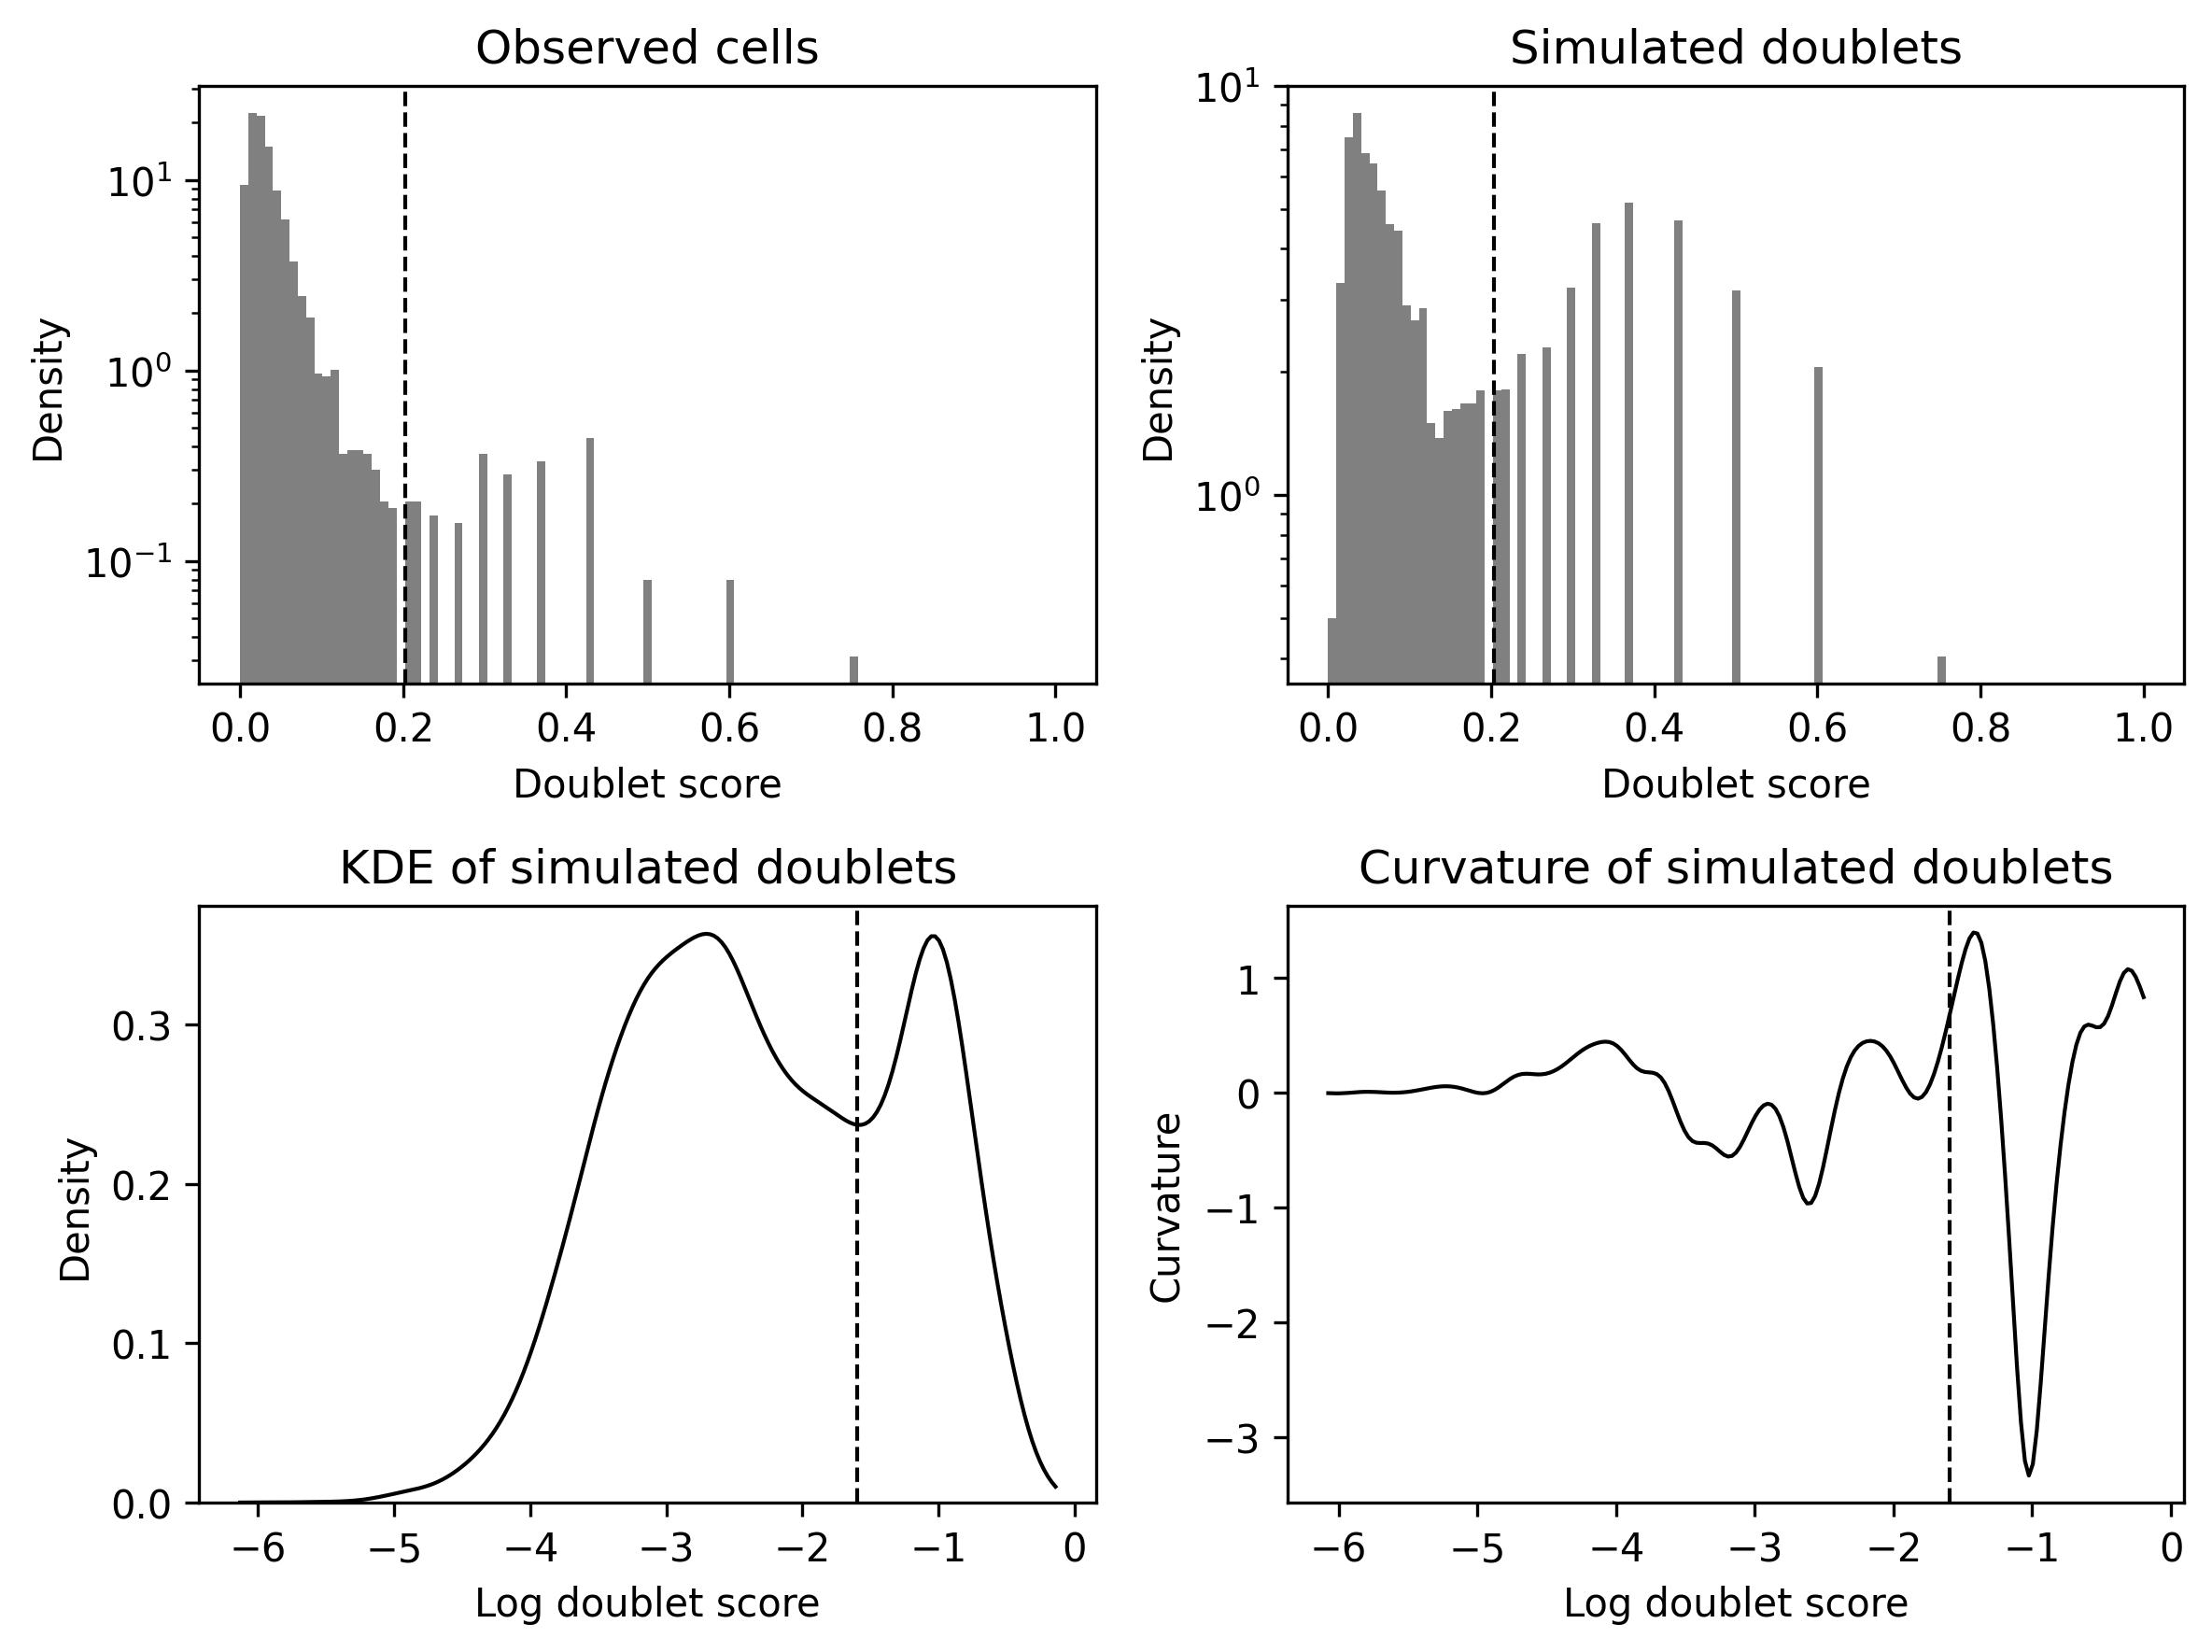

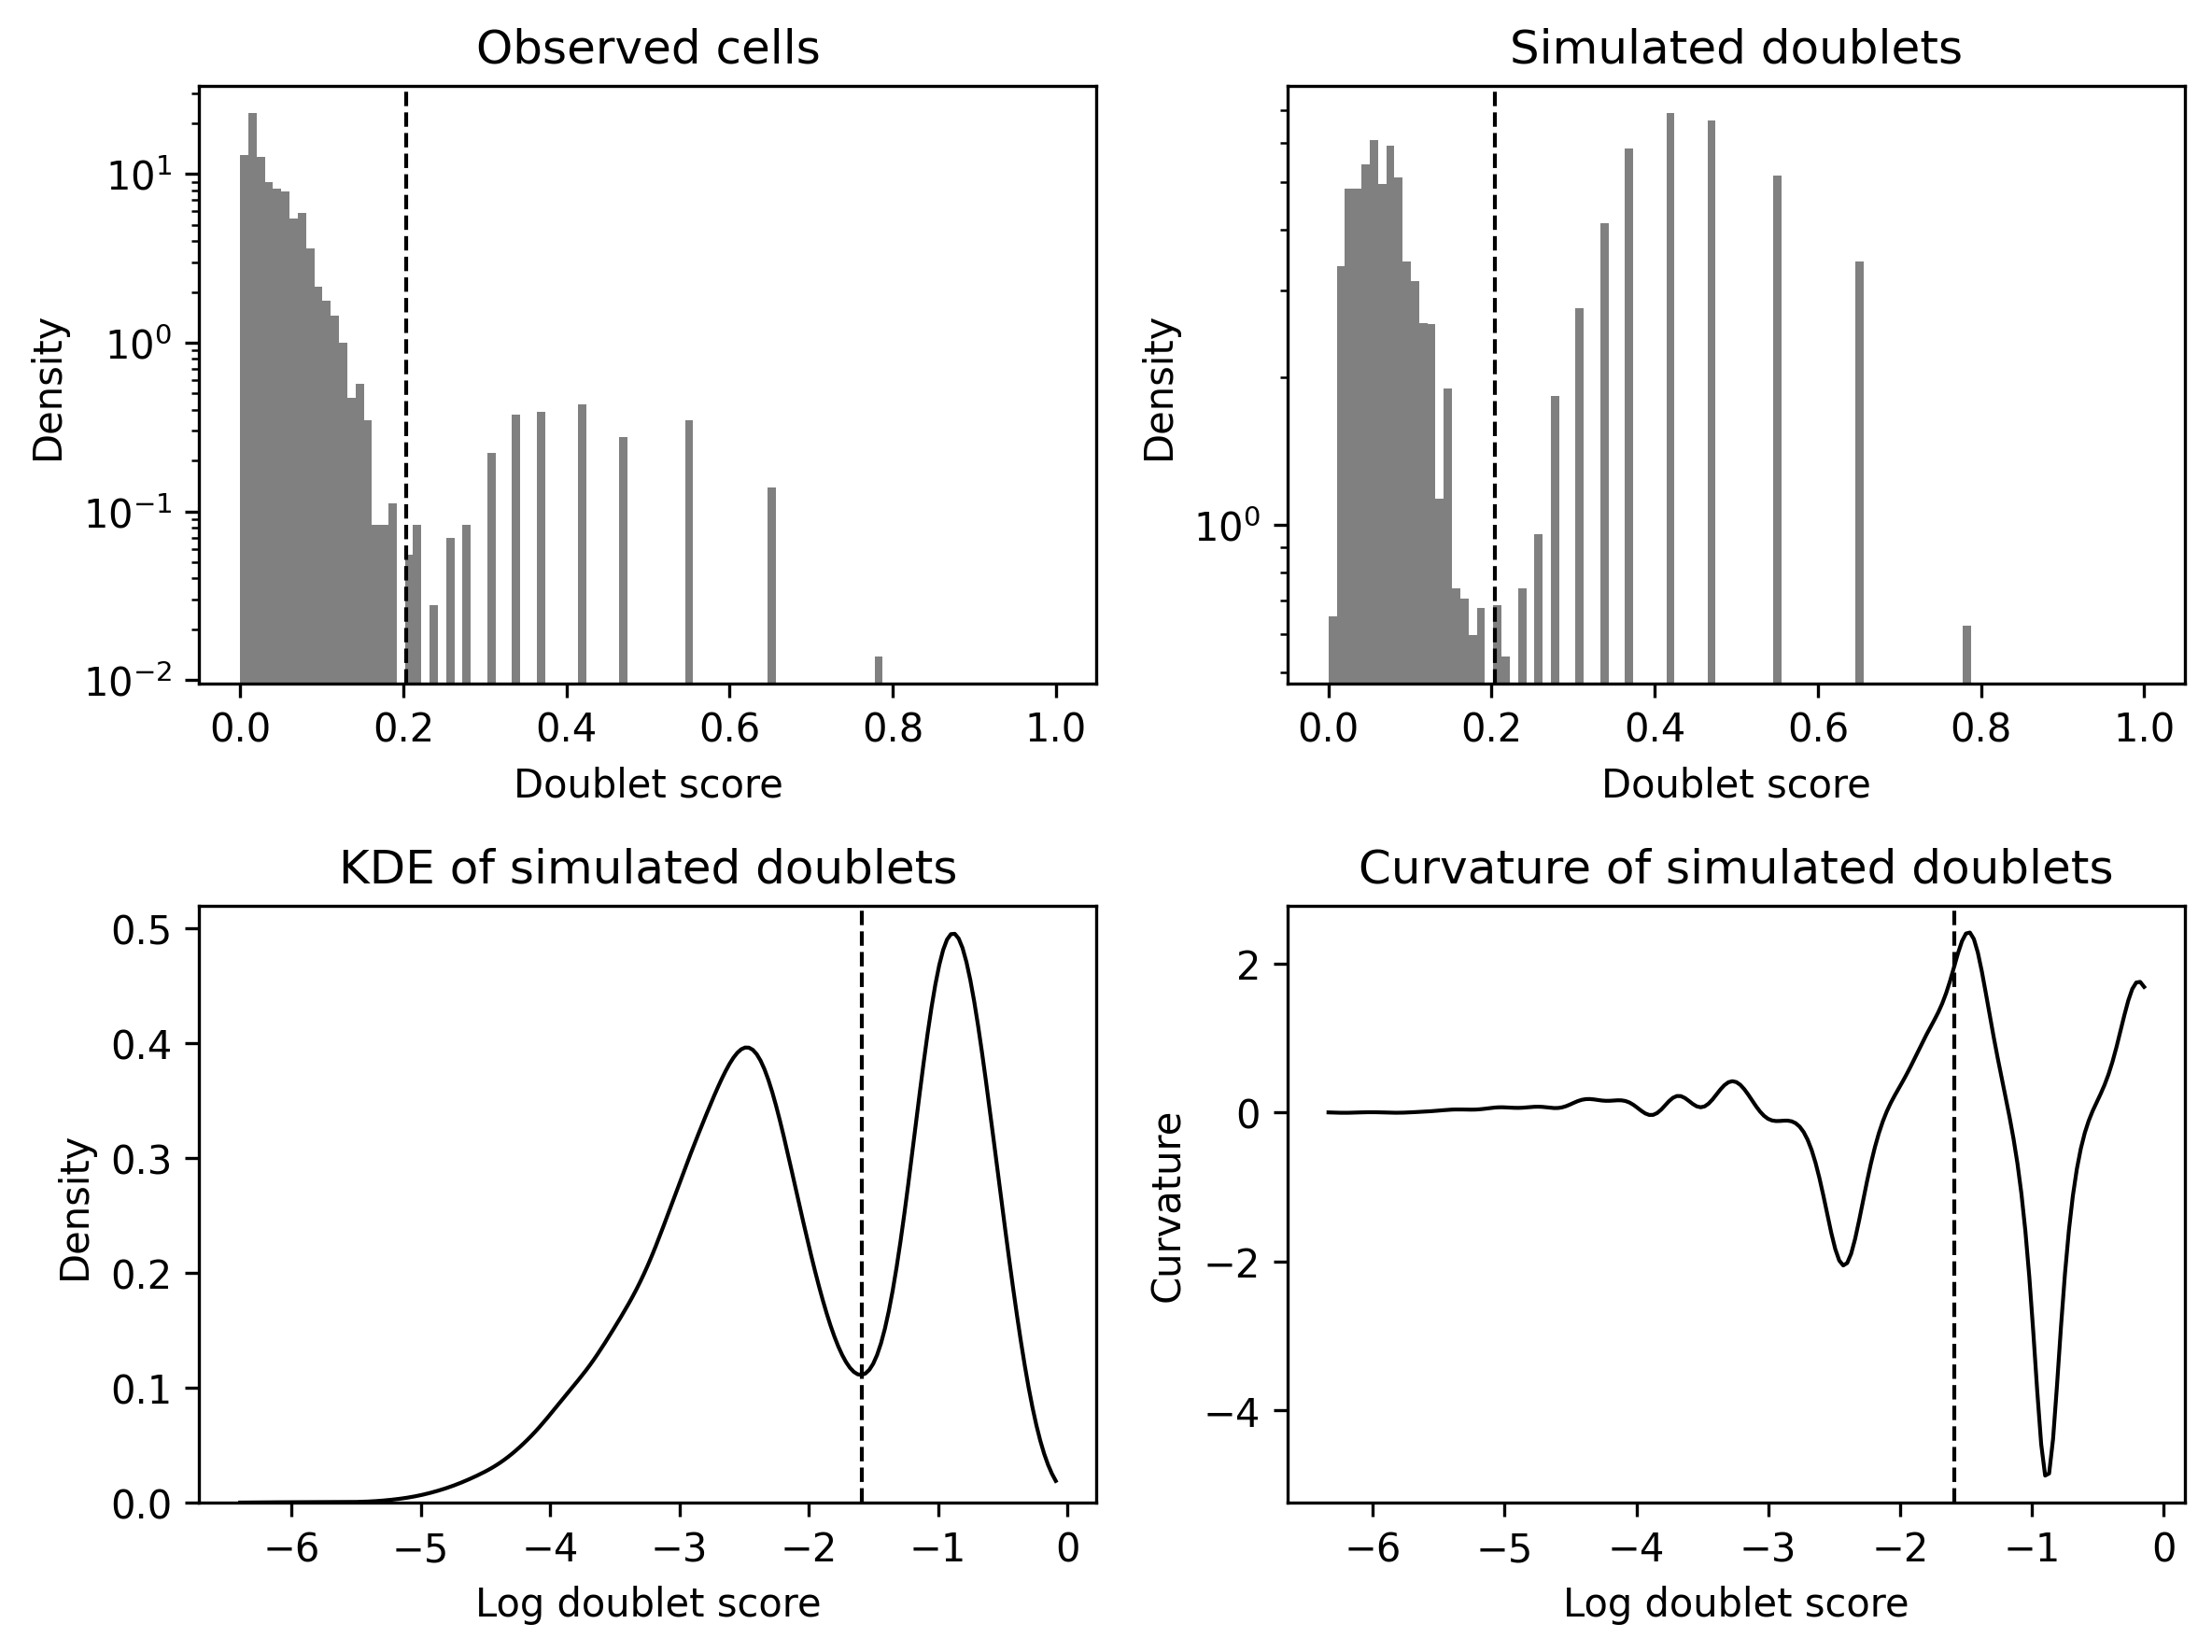

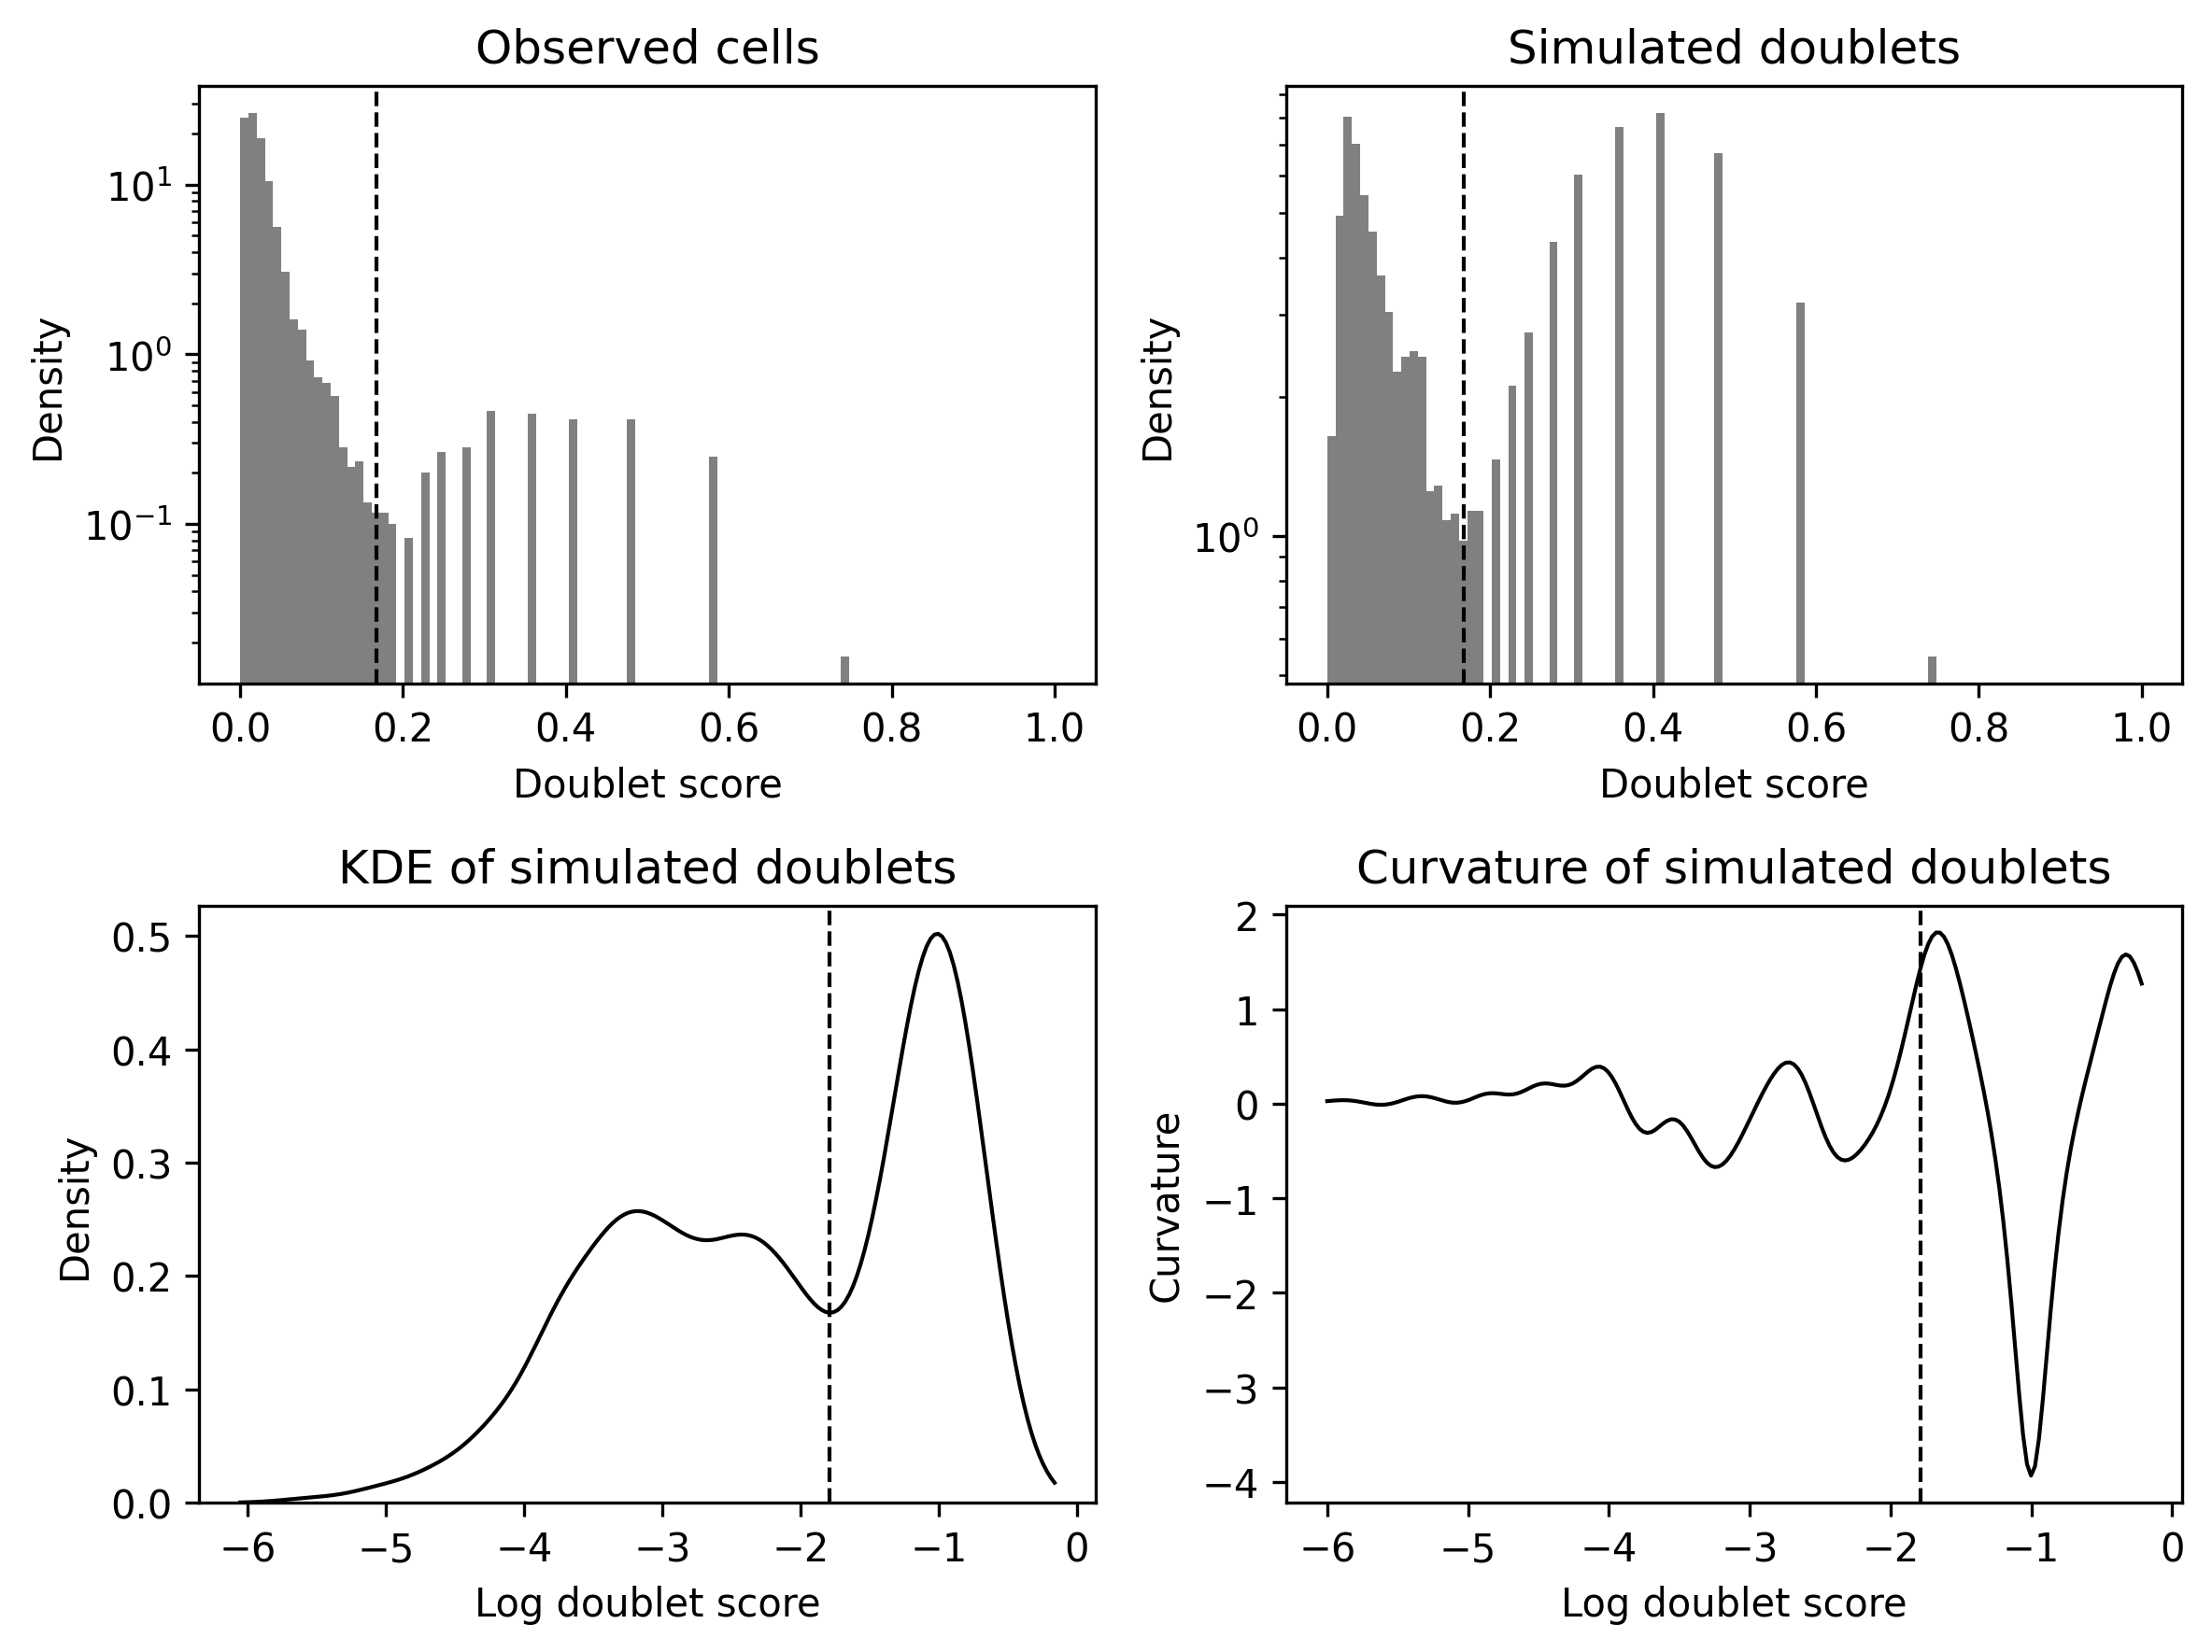

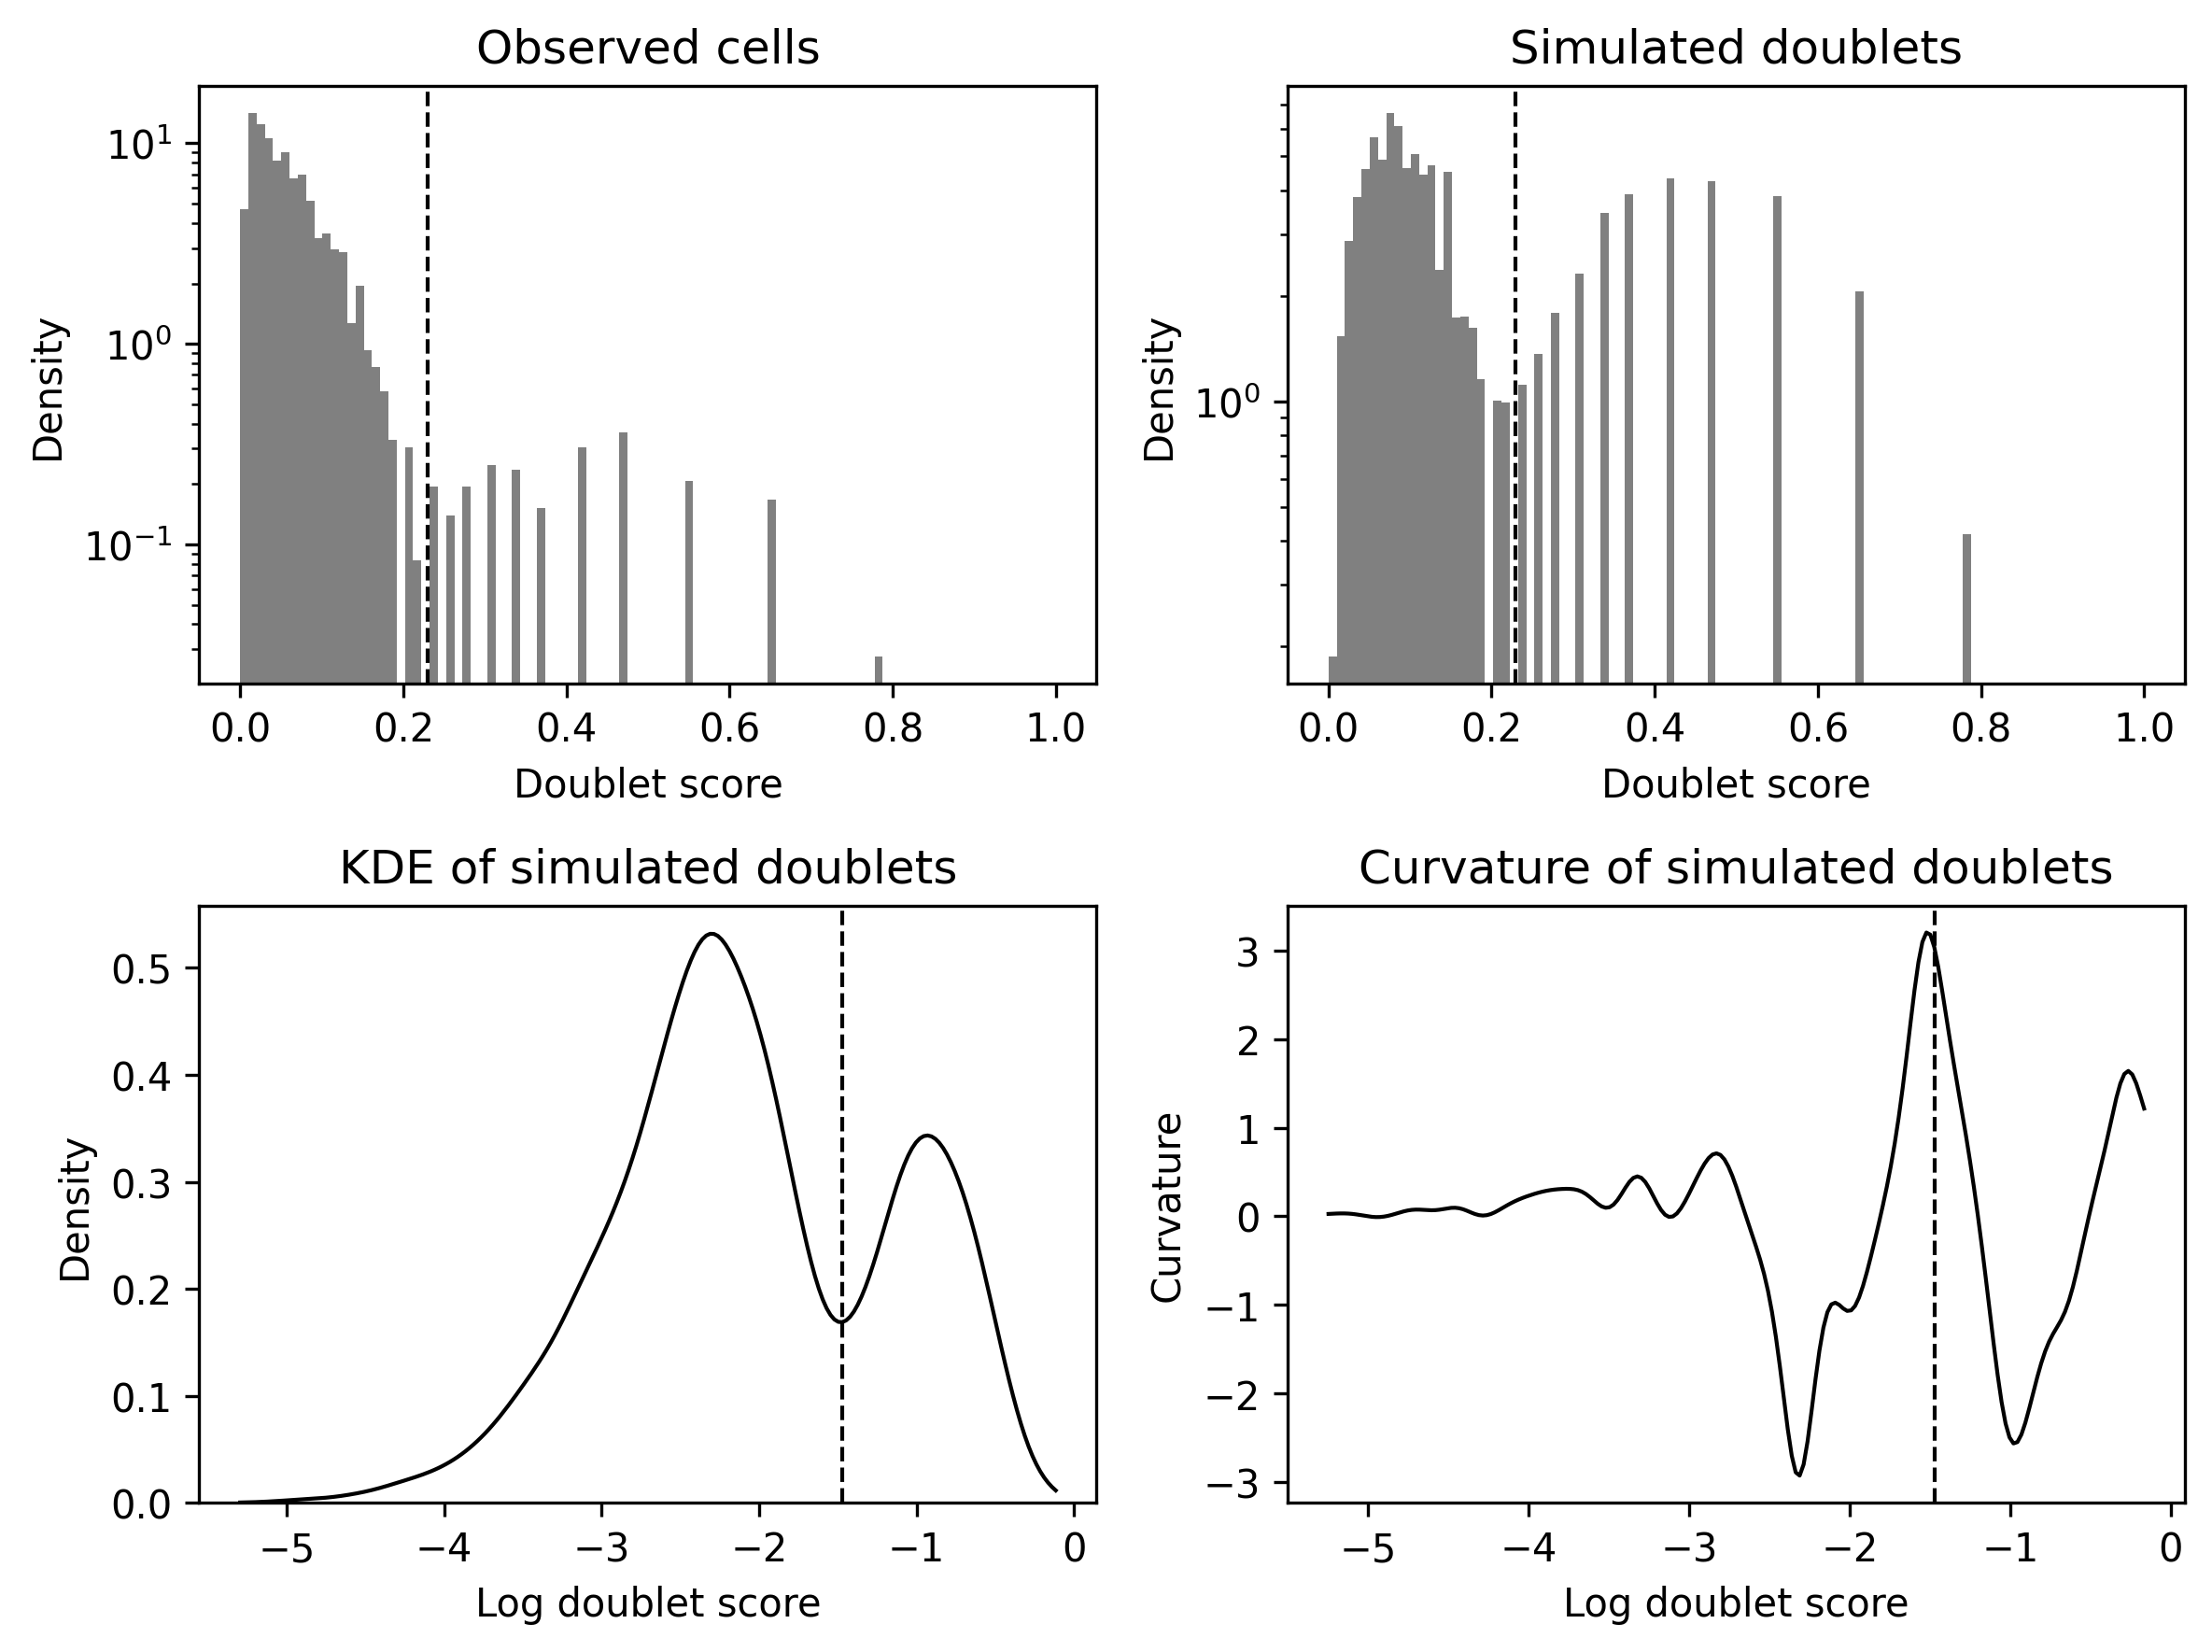

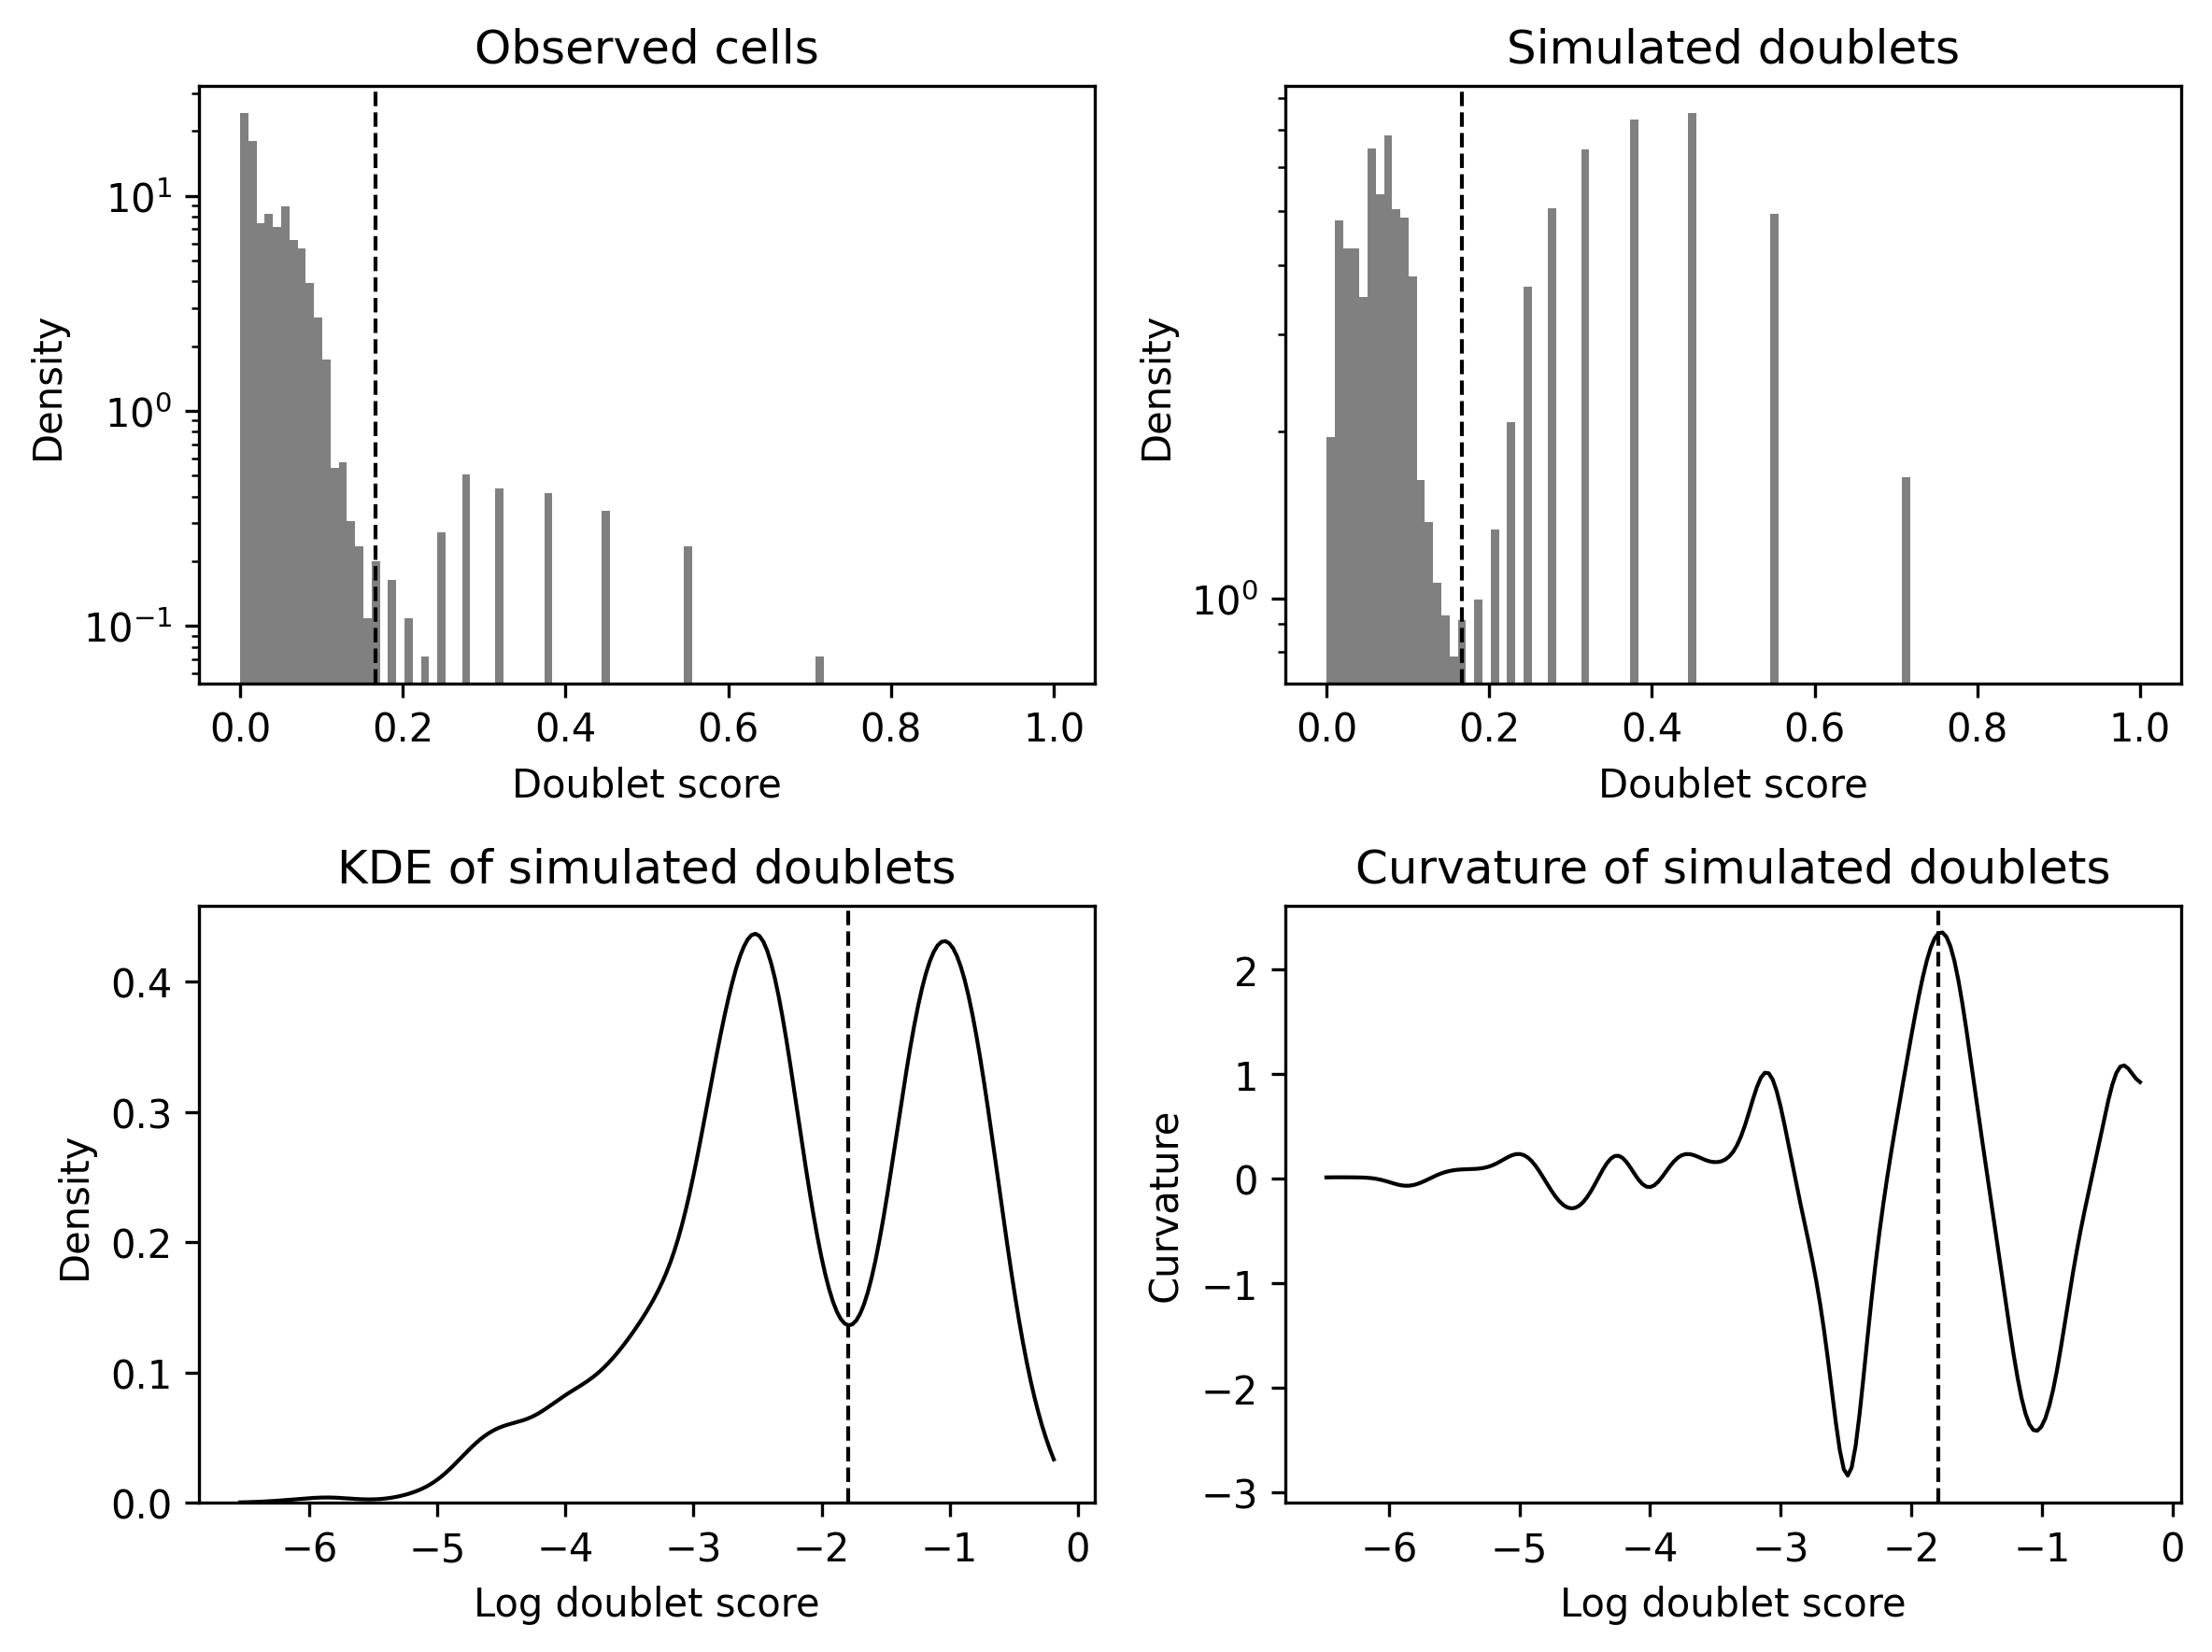

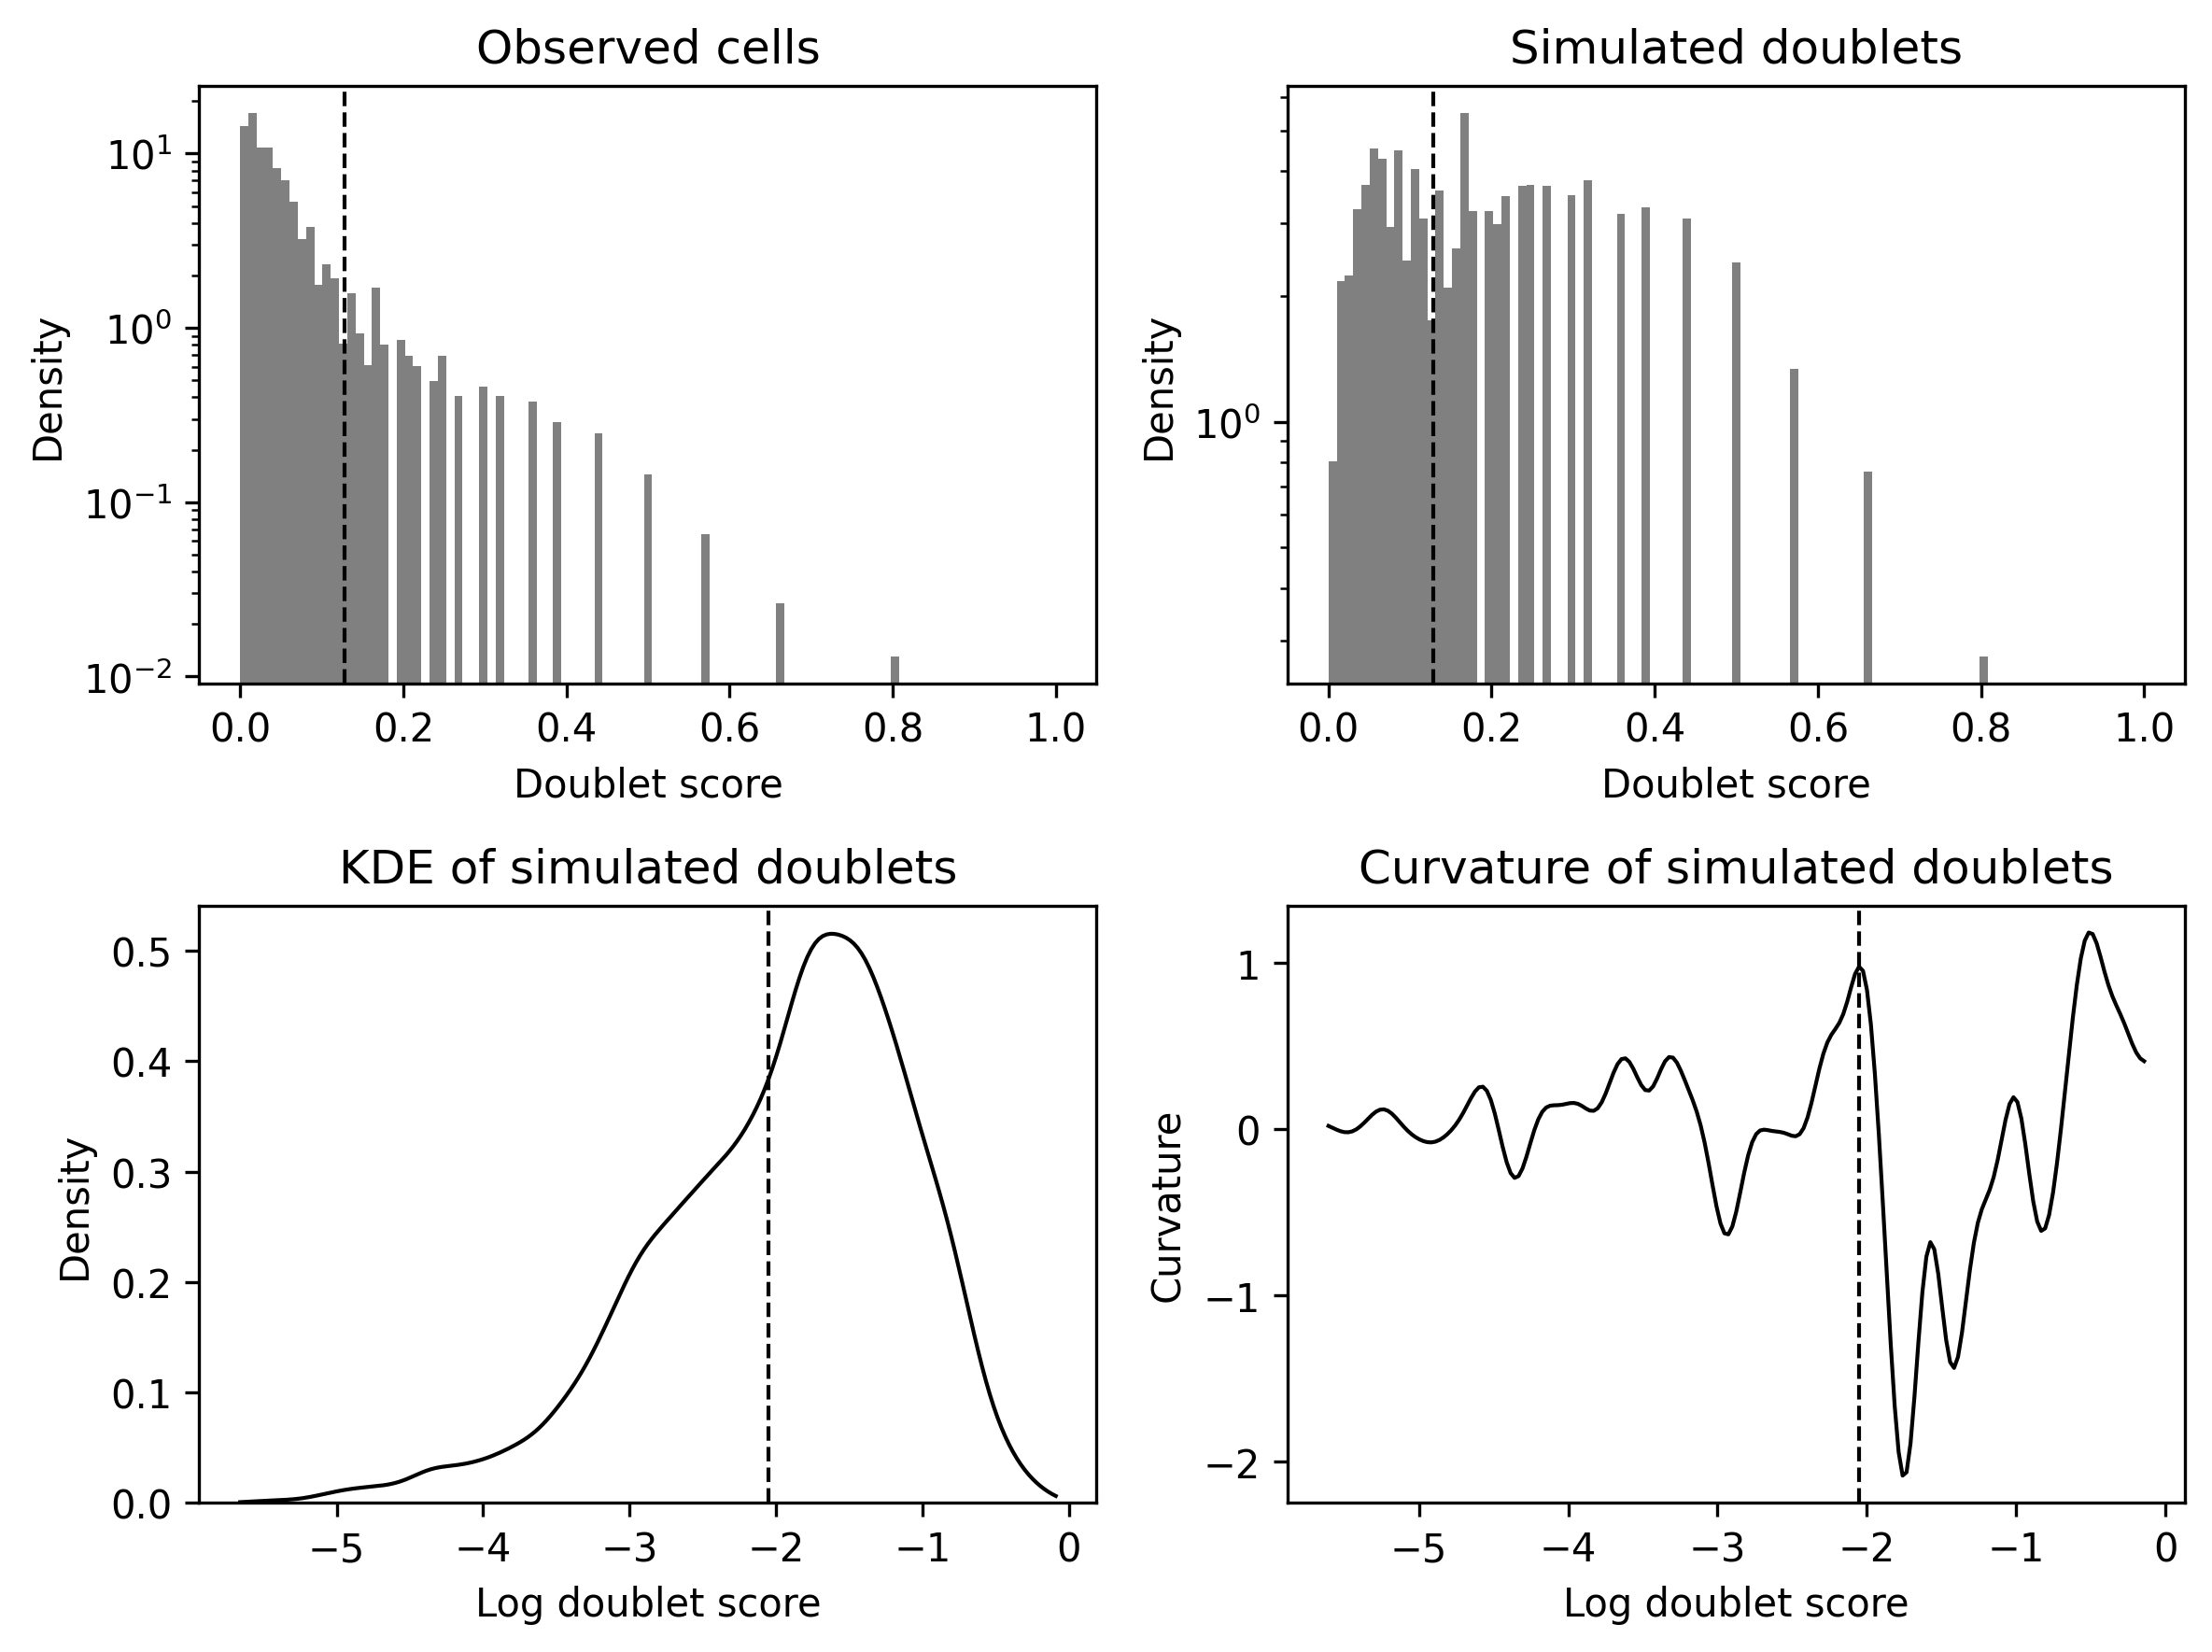

In [5]:
pg.infer_doublets(data, channel_attr = 'Channel', clust_attr = 'louvain_labels', robust = True)

In [9]:
data.uns['pred_dbl_cluster']

cluster  percentage      pval      qval
0      19   83.745583  0.000001  0.000008
1      17   10.421836  0.000002  0.000008
2       9    9.428008  0.000004  0.000008
3       6    8.605432  0.000005  0.000008
4      11    8.162100  0.000003  0.000008
5       8    7.954945  0.000005  0.000008
6       5    7.179487  0.000005  0.000008
7      10    6.188605  0.000135  0.000170

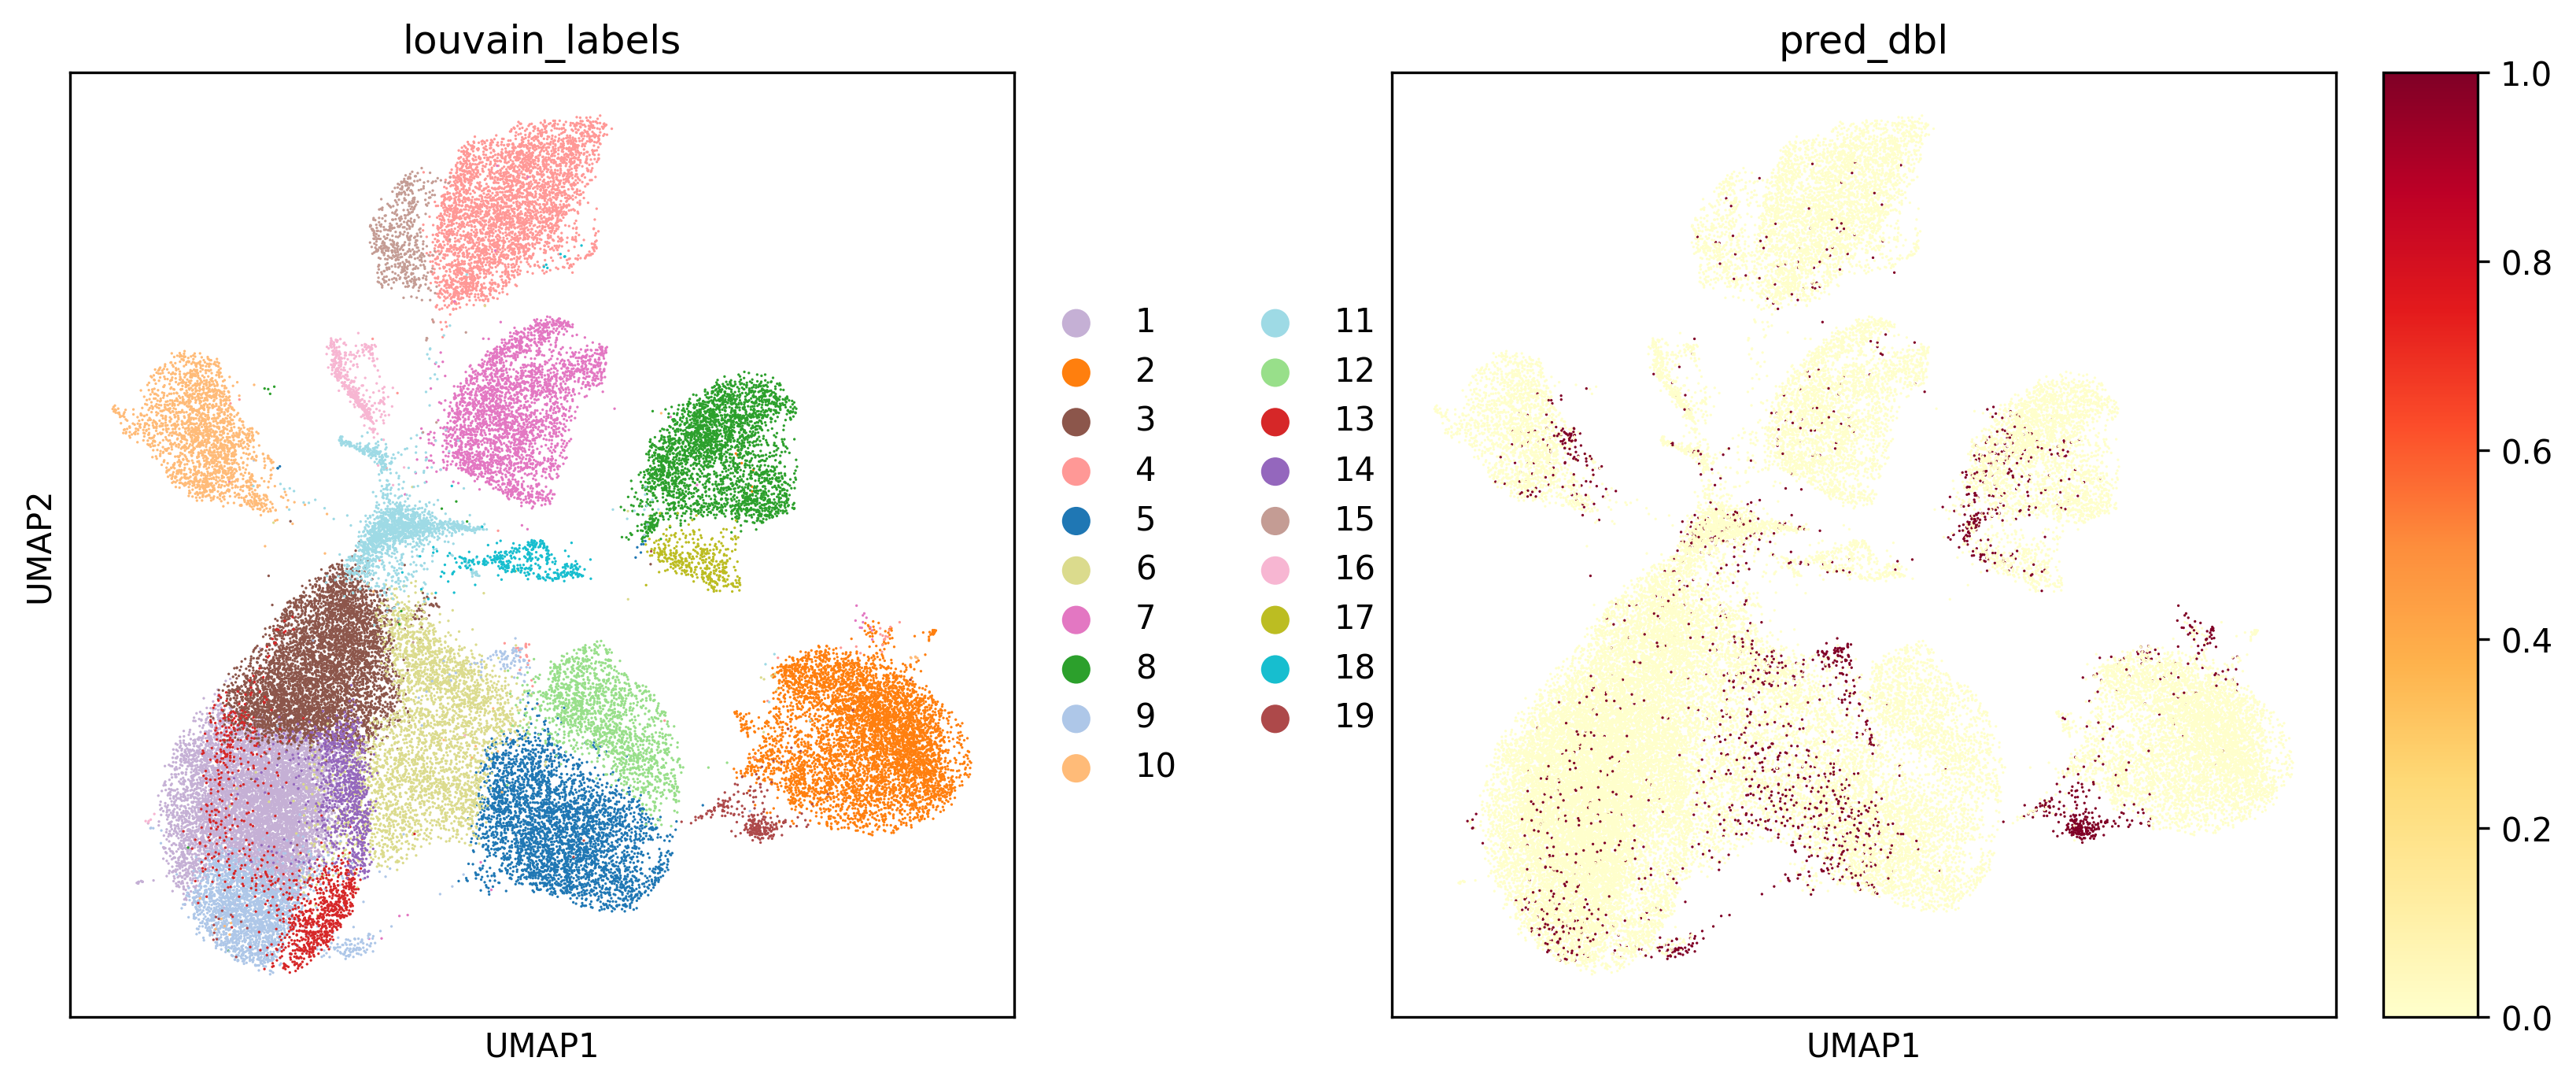

In [10]:
pg.scatter(data, attrs = ['louvain_labels', 'pred_dbl'])

In [11]:
data.obs['Channel'].value_counts(sort = False)

02-P005175-S022-R01     482
02-P118946-S070-R01     593
02-P166169-S022-R01     394
02-P166169-S109-R01      16
02-P240970-S016-R01     449
02-P248880-S041-R01    1442
02-P334354-S041-R01      75
02-P348762-S041-R01    1998
04-P054921-S080-R01    2020
04-P079042-S079-R01    6248
04-P103142-S069-R01      14
12-P230638-S003-R01    7147
12-P485759-S020-R01    5950
12-P617758-S003-R01    7137
12-P852049-S003-R01    5472
12-P890292-S003-R01    7564
Name: Channel, dtype: int64

In [12]:
pg.mark_doublets(data, dbl_clusts = 'louvain_labels:19')

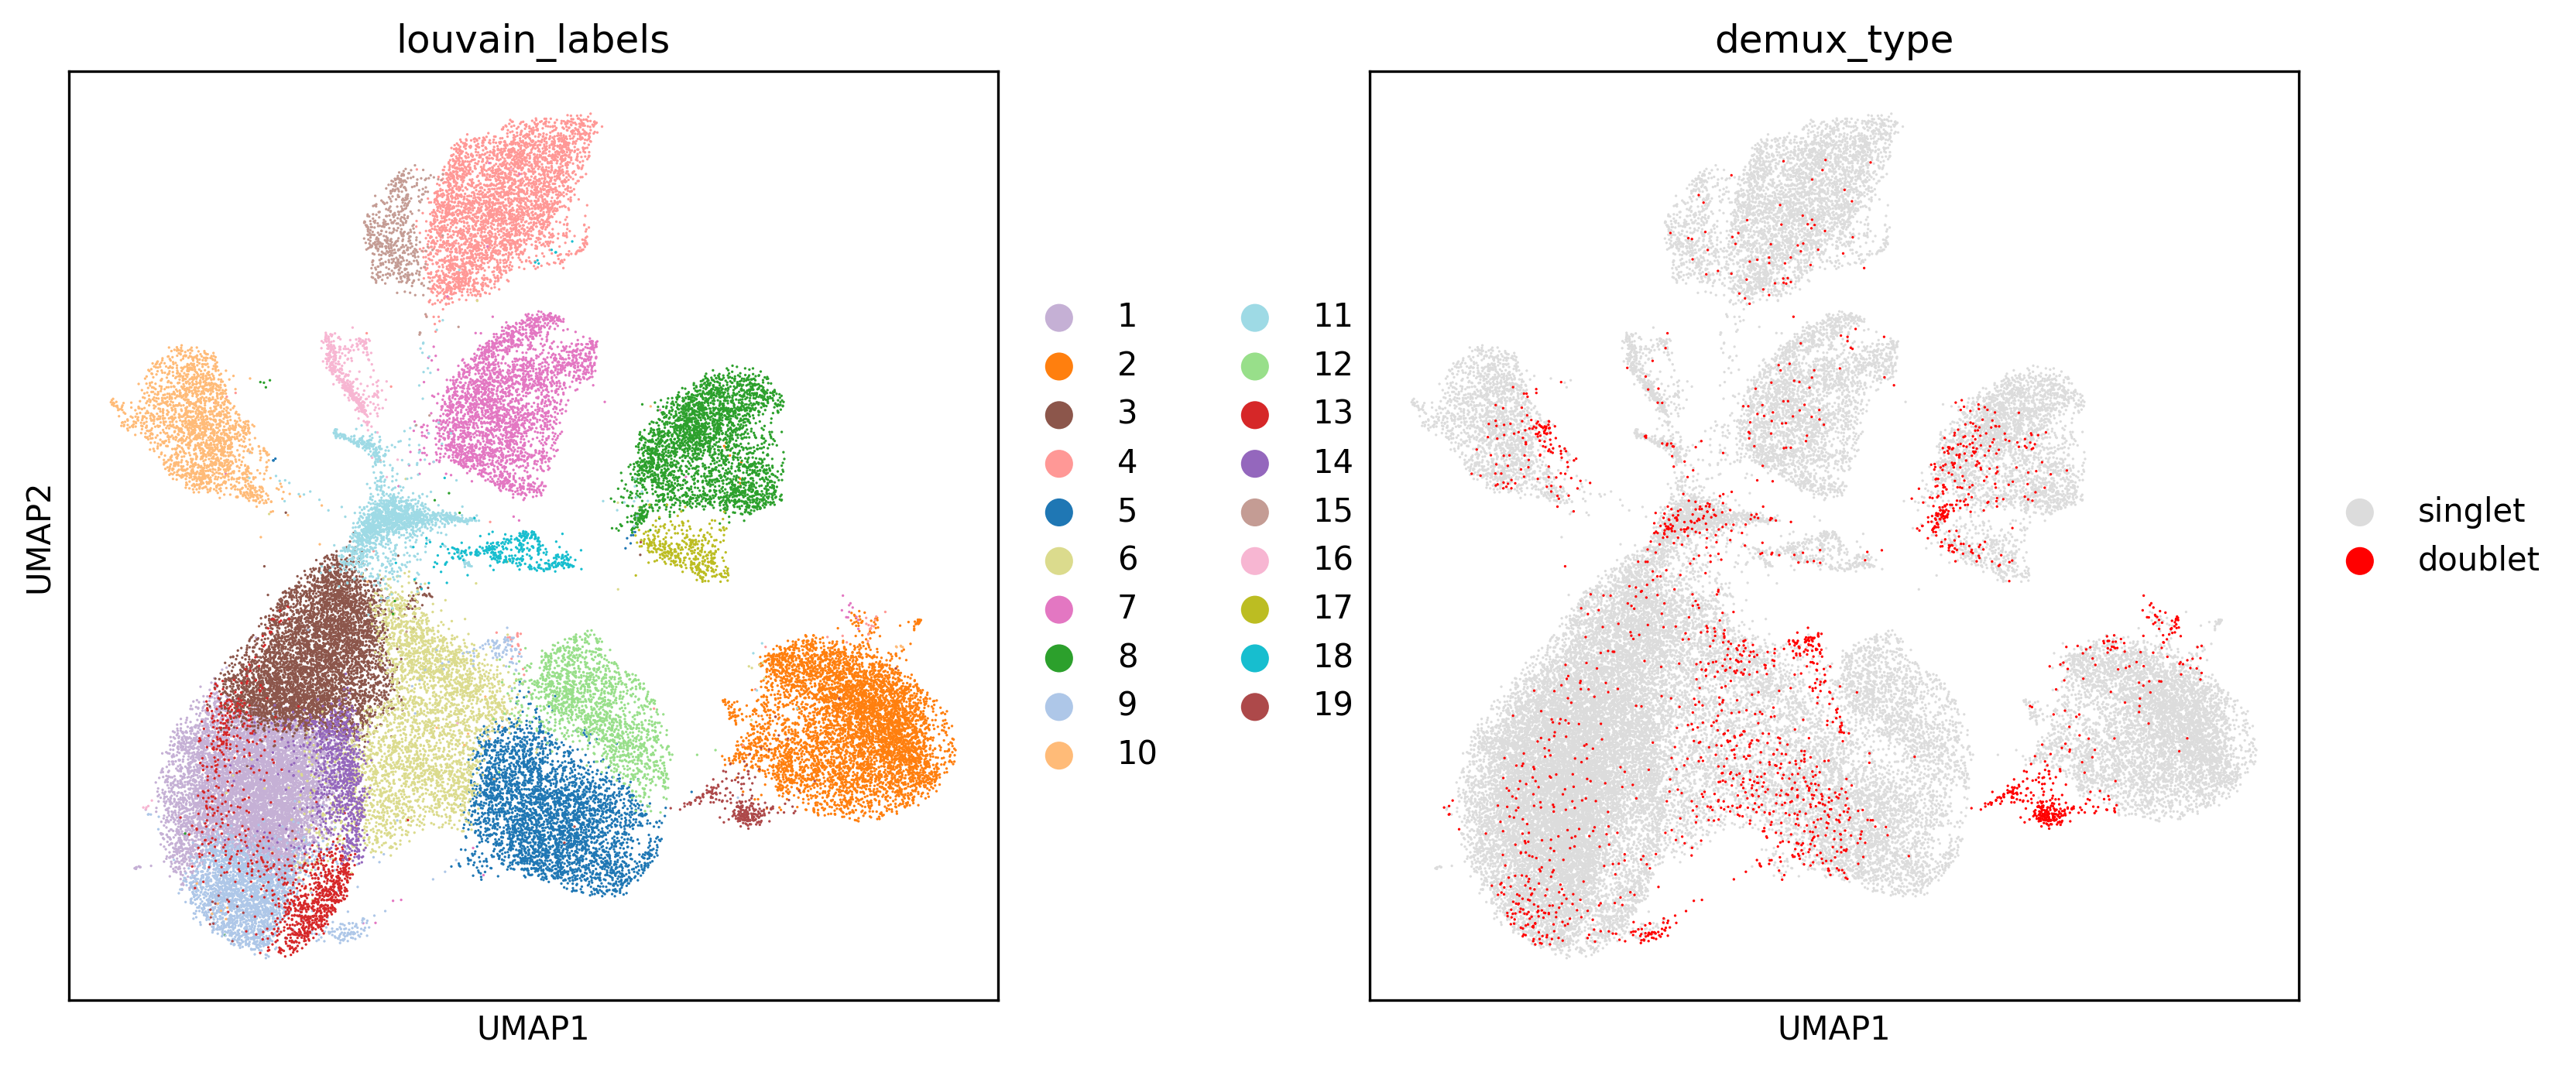

In [13]:
pg.scatter(data, attrs = ['louvain_labels', 'demux_type'], palettes = 'demux_type:gainsboro,red')

In [14]:
res = data.obs['demux_type'].value_counts()
print(res)
print(res['doublet']/res.sum())
print(res.sum())

singlet    44883
doublet     2118
Name: demux_type, dtype: int64
0.04506287100274462
47001


In [15]:
idx = data.obs['demux_type'] == 'doublet'
with open('liver_doublets.txt', 'w') as fout:
    fout.write('\n'.join(data.obs_names[idx]) + '\n')